In [35]:
import os
import torch
import numpy as np

# CODE FILES HERE
from model_params import get_model_data_tdcvae
from models.tdcvae.tdcvae import TD_Cvae
from solver import Solver
from dataloader import DataLoader
from directories import Directories
from plots import plot_losses, plot_gaussian_distributions, plot_rl_kl, plot_latent_space,\
plot_latent_manifold, plot_faces_grid, plot_faces_samples_grid,\
plot_prepro_alpha_params_distribution, plot_prepro_radius_params_distribution,\
plot_transformed_images, plot_y_space_thetas, plot_y_space_scales
from auxiliary import get_latent_spaces, transform_images, transform_images2
from preprocessing import RandomPreprocessing, DeterministicPreprocessing

# SETTINGS HERE
os.environ['CUDA_LAUNCH_BLOCKING'] = "1" # to see the CUDA stack
%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
# supress cluttering warnings in solutions
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# setting device on GPU if available, else CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

# Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cpu



In [ ]:
# Choose either MNIST/Lungscans
dataset_arg = "MNIST"
data = get_model_data_tdcvae(dataset_arg)

In [ ]:
directories = Directories("tdcvae", dataset_arg.lower(), data["z_dim"], make_dirs=False)
data_loader = DataLoader(directories, data["batch_size"], dataset_arg.lower(), scales=data["scales"])
model = TD_Cvae(data_loader.input_dim, data["hidden_dim"], data_loader.input_dim, data["z_dim"], data["beta"])
solver = Solver(model, data_loader, data["optimizer"], data["epochs"], data["optim_config"], step_config=data["step_config"],\
                lr_scheduler=data["lr_scheduler"], tdcvae_mode=True, save_model_state=False)
solver.main()

In [ ]:
#Uncomment to load a model to continue training.
#solver = torch.load("../results/tdcvae/MNIST_z=2_0/model_state.pt")
#solver.main()

In [3]:
#Uncomment to load a trained model for inference.
solver = torch.load("../../results_slurm/scales_thetas/model_state.pt", map_location='cpu')
solver.model.eval()
solver.data_loader.dataset = "mnist"

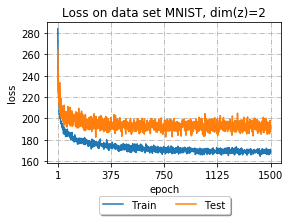

In [5]:
# Plotting train and test losses for all epochs
plot_losses(solver, solver.train_loss_history["train_loss_acc"], solver.test_loss_history)

epoch: 1, mu(z): -0.0572, stddev(z): 1.3620, var(z): 1.8550, var(mu(z)): 1.2074 E[var(q(z|x)]: 0.4605
epoch: 376, mu(z): 0.0068, stddev(z): 1.0987, var(z): 1.2072, var(mu(z)): 1.0966 E[var(q(z|x)]: 0.0069
epoch: 751, mu(z): 0.0263, stddev(z): 1.0367, var(z): 1.0748, var(mu(z)): 0.9860 E[var(q(z|x)]: 0.0054
epoch: 1500, mu(z): -0.0607, stddev(z): 0.9563, var(z): 0.9145, var(mu(z)): 0.8386 E[var(q(z|x)]: 0.0049


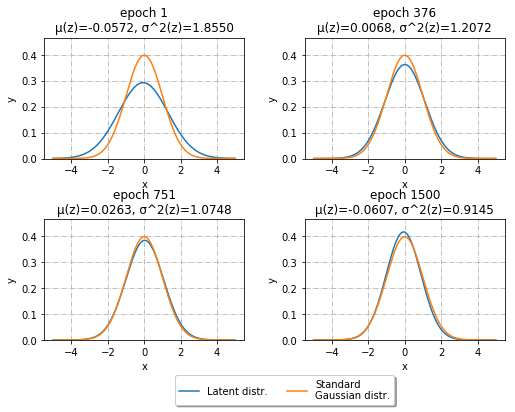

In [6]:
# Plotting the gaussian of z space and some metrics about the space
plot_gaussian_distributions(solver, len(solver.train_loss_history["train_loss_acc"]))

epoch: 1, train_loss: 283.99, test_loss: 264.42, recon. loss: 281.45, KL div.: 2.54
epoch: 2, train_loss: 237.26, test_loss: 242.54, recon. loss: 233.49, KL div.: 3.76
epoch: 3, train_loss: 232.74, test_loss: 233.16, recon. loss: 228.60, KL div.: 4.14
epoch: 4, train_loss: 231.56, test_loss: 244.58, recon. loss: 227.05, KL div.: 4.51
epoch: 5, train_loss: 226.61, test_loss: 224.15, recon. loss: 222.15, KL div.: 4.46
epoch: 6, train_loss: 219.80, test_loss: 229.44, recon. loss: 215.13, KL div.: 4.67
epoch: 7, train_loss: 220.41, test_loss: 232.54, recon. loss: 215.62, KL div.: 4.79
epoch: 8, train_loss: 219.20, test_loss: 216.11, recon. loss: 214.17, KL div.: 5.03
epoch: 9, train_loss: 213.49, test_loss: 222.58, recon. loss: 208.50, KL div.: 4.99
epoch: 10, train_loss: 210.84, test_loss: 219.04, recon. loss: 205.80, KL div.: 5.04
epoch: 11, train_loss: 212.75, test_loss: 217.67, recon. loss: 207.43, KL div.: 5.33
epoch: 12, train_loss: 203.15, test_loss: 210.61, recon. loss: 197.86, KL 

epoch: 1477, train_loss: 169.42, test_loss: 189.93, recon. loss: 163.58, KL div.: 5.84
epoch: 1478, train_loss: 168.75, test_loss: 195.89, recon. loss: 162.86, KL div.: 5.89
epoch: 1479, train_loss: 168.20, test_loss: 196.45, recon. loss: 162.28, KL div.: 5.92
epoch: 1480, train_loss: 170.43, test_loss: 189.53, recon. loss: 164.37, KL div.: 6.06
epoch: 1481, train_loss: 170.14, test_loss: 186.72, recon. loss: 164.20, KL div.: 5.94
epoch: 1482, train_loss: 169.30, test_loss: 191.75, recon. loss: 163.44, KL div.: 5.85
epoch: 1483, train_loss: 168.60, test_loss: 191.22, recon. loss: 162.70, KL div.: 5.90
epoch: 1484, train_loss: 170.65, test_loss: 192.15, recon. loss: 164.77, KL div.: 5.89
epoch: 1485, train_loss: 168.09, test_loss: 195.73, recon. loss: 162.20, KL div.: 5.89
epoch: 1486, train_loss: 167.20, test_loss: 194.52, recon. loss: 161.31, KL div.: 5.89
epoch: 1487, train_loss: 168.14, test_loss: 188.02, recon. loss: 162.21, KL div.: 5.93
epoch: 1488, train_loss: 168.36, test_loss:

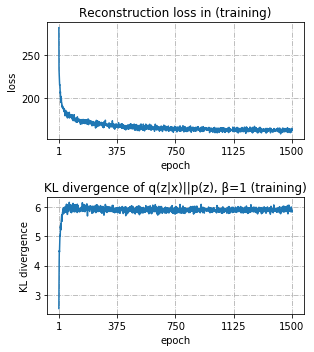

In [7]:
# Monitoring the reconstruction loss (likelihood lower bound) and KL divergence
DEBUG = 1
if DEBUG:
    for epoch, train_loss, test_loss, rl, kl in zip(solver.train_loss_history["epochs"], \
        solver.train_loss_history["train_loss_acc"], solver.test_loss_history, \
        solver.train_loss_history["recon_loss_acc"], solver.train_loss_history["kl_diverg_acc"]):
        print("epoch: {}, train_loss: {:.2f}, test_loss: {:.2f}, recon. loss: {:.2f}, KL div.: {:.2f}".format(
            epoch, train_loss, test_loss, rl, kl))
plot_rl_kl(solver, solver.train_loss_history["recon_loss_acc"], solver.train_loss_history["kl_diverg_acc"])

In [9]:
if solver.data_loader.thetas and solver.data_loader.scales:
    rand_transformation = RandomPreprocessing(solver.data_loader.num_test_samples, solver.data_loader.img_dims,\
                                    solver.data_loader.theta_range_1, solver.data_loader.theta_range_2,\
                                    solver.data_loader.scale_range_1, solver.data_loader.scale_range_2)
elif solver.data_loader.thetas:
    rand_transformation = RandomPreprocessing(solver.data_loader.num_test_samples, solver.data_loader.img_dims,\
                                    solver.data_loader.theta_range_1, solver.data_loader.theta_range_2)
elif solver.data_loader.scales:
    rand_transformation = RandomPreprocessing(solver.data_loader.num_test_samples, solver.data_loader.img_dims,\
                                    scale_range_1=solver.data_loader.scale_range_1, scale_range_2=solver.data_loader.scale_range_2)
z_space, y_space, _ = get_latent_spaces(solver, rand_transformation)

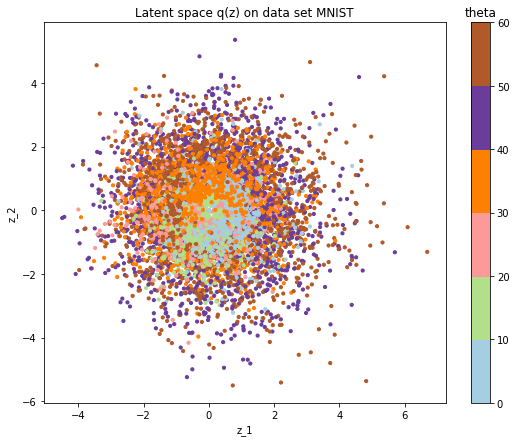

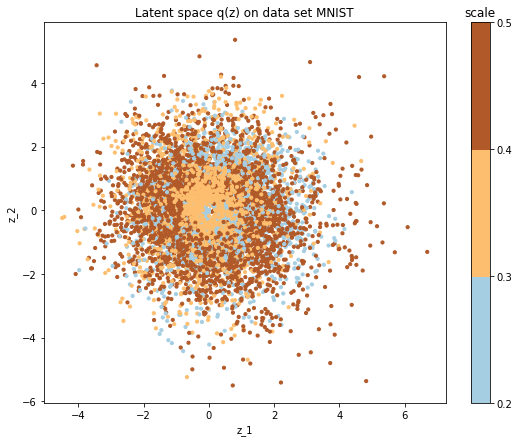

In [10]:
# visualize q(z) (latent space z)
if solver.model.z_dim == 2 and solver.data_loader.thetas or solver.data_loader.scales:
    if solver.data_loader.thetas:
        ticks = np.arange(solver.data_loader.theta_range_2[0], solver.data_loader.theta_range_2[1]+1, 10).tolist()
        labels = rand_transformation.prepro_params["theta_diff"].tolist()
        plot_latent_space(solver, z_space, ticks=ticks, var="z", title="theta", labels=labels, colors=len(ticks)-1)
    if solver.data_loader.scales:
        ticks = [round(0.1*x,1) for x in range(int(solver.data_loader.scale_range_2[0]*10),\
                                                       int((solver.data_loader.scale_range_2[1]+0.1)*10))]
        labels = rand_transformation.prepro_params["scale_diff"].tolist()
        plot_latent_space(solver, z_space, ticks=ticks, var="z", title="scale", labels=labels, colors=len(ticks)-1)
else:
    print("Plot of latent space not possible as dimension of z is not 2")

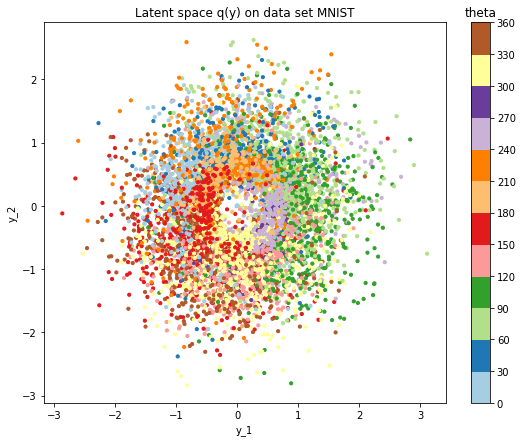

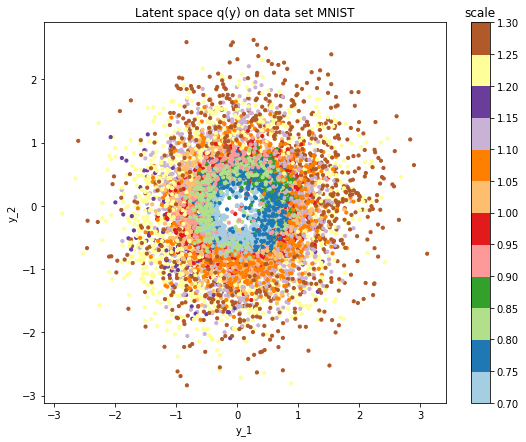

In [11]:
# visualize q(y)
if solver.model.z_dim == 2 and solver.data_loader.thetas or solver.data_loader.scales:
    if solver.data_loader.thetas:
        ticks = np.arange(solver.data_loader.theta_range_1[0], solver.data_loader.theta_range_1[1]+1, 30).tolist()
        labels = rand_transformation.prepro_params["theta_1"].tolist()
        plot_latent_space(solver, y_space, ticks=ticks, var="y", title="theta", labels=labels)
    if solver.data_loader.scales:
        ticks = np.linspace(solver.data_loader.scale_range_1[0], solver.data_loader.scale_range_1[1], 13).tolist()
        ticks = np.around(ticks, decimals=2)
        labels = rand_transformation.prepro_params["scale_1"].tolist()
        plot_latent_space(solver, y_space, ticks=ticks, var="y", title="scale", labels=labels)
else:
    print("Plot of latent space not possible as dimension of z is not 2")

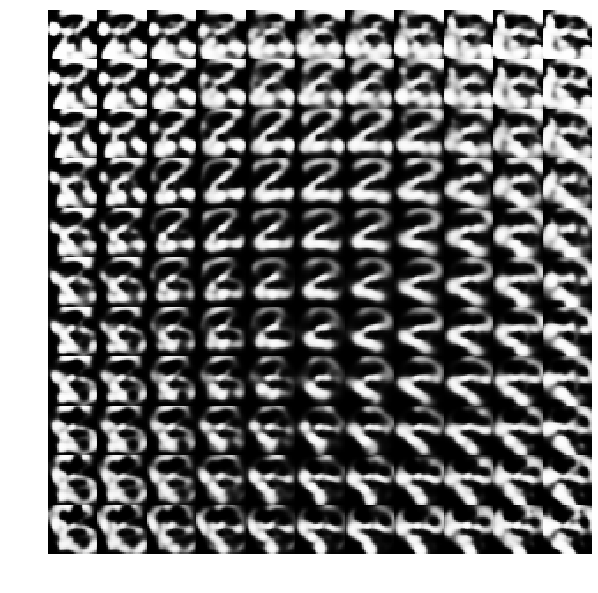

In [26]:
# Visualizations of learned q(z) for generative models with two-dimensional latent space
if solver.model.z_dim == 2:
    n = 11
    if solver.data_loader.thetas and solver.data_loader.scales:
        grid_x = np.linspace(-3, 3, n)
        grid_y = np.linspace(-3, 3, n)
    elif solver.data_loader.thetas:
        grid_x = np.linspace(-2, 2, n)
        grid_y = np.linspace(-2, 2, n)
    elif solver.data_loader.scales:
        grid_x = np.linspace(-2, 2, n)
        grid_y = np.linspace(-0.5, -3, n)
    test_loader = solver.data_loader.get_new_test_data_loader()
    x_t = iter(test_loader).next()[0]
    x_t, _ = rand_transformation.preprocess_batch(x_t)
    x_t = x_t[0].view(-1, solver.data_loader.input_dim)
    plot_latent_manifold(solver, "bone", grid_x, grid_y, n, x_t=x_t)
else:
    print("Plot is not possible as dimension of z is not 2 or model is loaded")

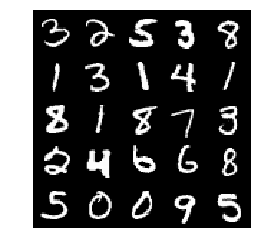

In [15]:
# show how the transformation actually produces results in practice.
test_loader = solver.data_loader.get_new_test_data_loader()
file_name = solver.data_loader.directories.result_dir + "/plot_transformed_images_"\
            + solver.data_loader.dataset + ".png"
plot_transformed_images(test_loader, solver.data_loader.batch_size, save_image=solver.data_loader.directories.make_dirs, file_name=file_name)

In [34]:
if solver.data_loader.thetas and solver.data_loader.scales and solver.model.z_dim == 2:
    test_loader = solver.data_loader.get_new_test_data_loader()
    num_rotations = 30
    num_scales = 30
    num_samples = 20
    det_transformation = DeterministicPreprocessing(num_samples, solver.data_loader.img_dims,\
                                                num_rotations, num_scales)
    ys = np.zeros((det_transformation.scales.shape[0], det_transformation.thetas.shape[0], num_samples, 2))
    transform_images(solver, det_transformation, test_loader, ys)
    if solver.data_loader.directories.make_dirs:
        torch.save(ys, solver.data_loader.directories.result_dir + "/ys.pt")

0.7 0.0
0.0
torch.Size([1, 2])
0.7 12.41
0.2165953601724963
torch.Size([1, 2])
0.7 24.83
0.433365253270192
torch.Size([1, 2])
0.7 37.24
0.6499606134426884
torch.Size([1, 2])
0.7 49.66
0.866730506540384
torch.Size([1, 2])
0.7 62.07
1.0833258667128804
torch.Size([1, 2])
0.7 74.48
1.2999212268853768
torch.Size([1, 2])
0.7 86.9
1.5166911199830724
torch.Size([1, 2])
0.7 99.31
1.7332864801555687
torch.Size([1, 2])
0.7 111.72
1.9498818403280649
torch.Size([1, 2])
0.7 124.14
2.166651733425761
torch.Size([1, 2])
0.7 136.55
2.383247093598257
torch.Size([1, 2])
0.7 148.97
2.6000169866959526
torch.Size([1, 2])
0.7 161.38
2.8166123468684487
torch.Size([1, 2])
0.7 173.79
3.0332077070409453
torch.Size([1, 2])
0.7 186.21
3.2499776001386413
torch.Size([1, 2])
0.7 198.62
3.4665729603111375
torch.Size([1, 2])
0.7 211.03
3.6831683204836336
torch.Size([1, 2])
0.7 223.45
3.899938213581329
torch.Size([1, 2])
0.7 235.86
4.116533573753826
torch.Size([1, 2])
0.7 248.28
4.333303466851522
torch.Size([1, 2])
0.7 2

torch.Size([1, 2])
0.87 235.86
4.116533573753826
torch.Size([1, 2])
0.87 248.28
4.333303466851522
torch.Size([1, 2])
0.87 260.69
4.549898827024018
torch.Size([1, 2])
0.87 273.1
4.766494187196514
torch.Size([1, 2])
0.87 285.52
4.98326408029421
torch.Size([1, 2])
0.87 297.93
5.199859440466706
torch.Size([1, 2])
0.87 310.34
5.416454800639202
torch.Size([1, 2])
0.87 322.76
5.6332246937368975
torch.Size([1, 2])
0.87 335.17
5.8498200539093945
torch.Size([1, 2])
0.87 347.59
6.066589947007089
torch.Size([1, 2])
0.87 360.0
6.283185307179586
torch.Size([1, 2])
0.89 0.0
0.0
torch.Size([1, 2])
0.89 12.41
0.2165953601724963
torch.Size([1, 2])
0.89 24.83
0.433365253270192
torch.Size([1, 2])
0.89 37.24
0.6499606134426884
torch.Size([1, 2])
0.89 49.66
0.866730506540384
torch.Size([1, 2])
0.89 62.07
1.0833258667128804
torch.Size([1, 2])
0.89 74.48
1.2999212268853768
torch.Size([1, 2])
0.89 86.9
1.5166911199830724
torch.Size([1, 2])
0.89 99.31
1.7332864801555687
torch.Size([1, 2])
0.89 111.72
1.94988184

torch.Size([1, 2])
1.01 37.24
0.6499606134426884
torch.Size([1, 2])
1.01 49.66
0.866730506540384
torch.Size([1, 2])
1.01 62.07
1.0833258667128804
torch.Size([1, 2])
1.01 74.48
1.2999212268853768
torch.Size([1, 2])
1.01 86.9
1.5166911199830724
torch.Size([1, 2])
1.01 99.31
1.7332864801555687
torch.Size([1, 2])
1.01 111.72
1.9498818403280649
torch.Size([1, 2])
1.01 124.14
2.166651733425761
torch.Size([1, 2])
1.01 136.55
2.383247093598257
torch.Size([1, 2])
1.01 148.97
2.6000169866959526
torch.Size([1, 2])
1.01 161.38
2.8166123468684487
torch.Size([1, 2])
1.01 173.79
3.0332077070409453
torch.Size([1, 2])
1.01 186.21
3.2499776001386413
torch.Size([1, 2])
1.01 198.62
3.4665729603111375
torch.Size([1, 2])
1.01 211.03
3.6831683204836336
torch.Size([1, 2])
1.01 223.45
3.899938213581329
torch.Size([1, 2])
1.01 235.86
4.116533573753826
torch.Size([1, 2])
1.01 248.28
4.333303466851522
torch.Size([1, 2])
1.01 260.69
4.549898827024018
torch.Size([1, 2])
1.01 273.1
4.766494187196514
torch.Size([1, 2

torch.Size([1, 2])
1.13 347.59
6.066589947007089
torch.Size([1, 2])
1.13 360.0
6.283185307179586
torch.Size([1, 2])
1.16 0.0
0.0
torch.Size([1, 2])
1.16 12.41
0.2165953601724963
torch.Size([1, 2])
1.16 24.83
0.433365253270192
torch.Size([1, 2])
1.16 37.24
0.6499606134426884
torch.Size([1, 2])
1.16 49.66
0.866730506540384
torch.Size([1, 2])
1.16 62.07
1.0833258667128804
torch.Size([1, 2])
1.16 74.48
1.2999212268853768
torch.Size([1, 2])
1.16 86.9
1.5166911199830724
torch.Size([1, 2])
1.16 99.31
1.7332864801555687
torch.Size([1, 2])
1.16 111.72
1.9498818403280649
torch.Size([1, 2])
1.16 124.14
2.166651733425761
torch.Size([1, 2])
1.16 136.55
2.383247093598257
torch.Size([1, 2])
1.16 148.97
2.6000169866959526
torch.Size([1, 2])
1.16 161.38
2.8166123468684487
torch.Size([1, 2])
1.16 173.79
3.0332077070409453
torch.Size([1, 2])
1.16 186.21
3.2499776001386413
torch.Size([1, 2])
1.16 198.62
3.4665729603111375
torch.Size([1, 2])
1.16 211.03
3.6831683204836336
torch.Size([1, 2])
1.16 223.45
3.8

torch.Size([1, 2])
1.28 360.0
6.283185307179586
torch.Size([1, 2])
1.3 0.0
0.0
torch.Size([1, 2])
1.3 12.41
0.2165953601724963
torch.Size([1, 2])
1.3 24.83
0.433365253270192
torch.Size([1, 2])
1.3 37.24
0.6499606134426884
torch.Size([1, 2])
1.3 49.66
0.866730506540384
torch.Size([1, 2])
1.3 62.07
1.0833258667128804
torch.Size([1, 2])
1.3 74.48
1.2999212268853768
torch.Size([1, 2])
1.3 86.9
1.5166911199830724
torch.Size([1, 2])
1.3 99.31
1.7332864801555687
torch.Size([1, 2])
1.3 111.72
1.9498818403280649
torch.Size([1, 2])
1.3 124.14
2.166651733425761
torch.Size([1, 2])
1.3 136.55
2.383247093598257
torch.Size([1, 2])
1.3 148.97
2.6000169866959526
torch.Size([1, 2])
1.3 161.38
2.8166123468684487
torch.Size([1, 2])
1.3 173.79
3.0332077070409453
torch.Size([1, 2])
1.3 186.21
3.2499776001386413
torch.Size([1, 2])
1.3 198.62
3.4665729603111375
torch.Size([1, 2])
1.3 211.03
3.6831683204836336
torch.Size([1, 2])
1.3 223.45
3.899938213581329
torch.Size([1, 2])
1.3 235.86
4.116533573753826
torch

0.78 235.86
4.116533573753826
torch.Size([1, 2])
0.78 248.28
4.333303466851522
torch.Size([1, 2])
0.78 260.69
4.549898827024018
torch.Size([1, 2])
0.78 273.1
4.766494187196514
torch.Size([1, 2])
0.78 285.52
4.98326408029421
torch.Size([1, 2])
0.78 297.93
5.199859440466706
torch.Size([1, 2])
0.78 310.34
5.416454800639202
torch.Size([1, 2])
0.78 322.76
5.6332246937368975
torch.Size([1, 2])
0.78 335.17
5.8498200539093945
torch.Size([1, 2])
0.78 347.59
6.066589947007089
torch.Size([1, 2])
0.78 360.0
6.283185307179586
torch.Size([1, 2])
0.8 0.0
0.0
torch.Size([1, 2])
0.8 12.41
0.2165953601724963
torch.Size([1, 2])
0.8 24.83
0.433365253270192
torch.Size([1, 2])
0.8 37.24
0.6499606134426884
torch.Size([1, 2])
0.8 49.66
0.866730506540384
torch.Size([1, 2])
0.8 62.07
1.0833258667128804
torch.Size([1, 2])
0.8 74.48
1.2999212268853768
torch.Size([1, 2])
0.8 86.9
1.5166911199830724
torch.Size([1, 2])
0.8 99.31
1.7332864801555687
torch.Size([1, 2])
0.8 111.72
1.9498818403280649
torch.Size([1, 2])
0

0.93 223.45
3.899938213581329
torch.Size([1, 2])
0.93 235.86
4.116533573753826
torch.Size([1, 2])
0.93 248.28
4.333303466851522
torch.Size([1, 2])
0.93 260.69
4.549898827024018
torch.Size([1, 2])
0.93 273.1
4.766494187196514
torch.Size([1, 2])
0.93 285.52
4.98326408029421
torch.Size([1, 2])
0.93 297.93
5.199859440466706
torch.Size([1, 2])
0.93 310.34
5.416454800639202
torch.Size([1, 2])
0.93 322.76
5.6332246937368975
torch.Size([1, 2])
0.93 335.17
5.8498200539093945
torch.Size([1, 2])
0.93 347.59
6.066589947007089
torch.Size([1, 2])
0.93 360.0
6.283185307179586
torch.Size([1, 2])
0.95 0.0
0.0
torch.Size([1, 2])
0.95 12.41
0.2165953601724963
torch.Size([1, 2])
0.95 24.83
0.433365253270192
torch.Size([1, 2])
0.95 37.24
0.6499606134426884
torch.Size([1, 2])
0.95 49.66
0.866730506540384
torch.Size([1, 2])
0.95 62.07
1.0833258667128804
torch.Size([1, 2])
0.95 74.48
1.2999212268853768
torch.Size([1, 2])
0.95 86.9
1.5166911199830724
torch.Size([1, 2])
0.95 99.31
1.7332864801555687
torch.Size(

torch.Size([1, 2])
1.09 148.97
2.6000169866959526
torch.Size([1, 2])
1.09 161.38
2.8166123468684487
torch.Size([1, 2])
1.09 173.79
3.0332077070409453
torch.Size([1, 2])
1.09 186.21
3.2499776001386413
torch.Size([1, 2])
1.09 198.62
3.4665729603111375
torch.Size([1, 2])
1.09 211.03
3.6831683204836336
torch.Size([1, 2])
1.09 223.45
3.899938213581329
torch.Size([1, 2])
1.09 235.86
4.116533573753826
torch.Size([1, 2])
1.09 248.28
4.333303466851522
torch.Size([1, 2])
1.09 260.69
4.549898827024018
torch.Size([1, 2])
1.09 273.1
4.766494187196514
torch.Size([1, 2])
1.09 285.52
4.98326408029421
torch.Size([1, 2])
1.09 297.93
5.199859440466706
torch.Size([1, 2])
1.09 310.34
5.416454800639202
torch.Size([1, 2])
1.09 322.76
5.6332246937368975
torch.Size([1, 2])
1.09 335.17
5.8498200539093945
torch.Size([1, 2])
1.09 347.59
6.066589947007089
torch.Size([1, 2])
1.09 360.0
6.283185307179586
torch.Size([1, 2])
1.11 0.0
0.0
torch.Size([1, 2])
1.11 12.41
0.2165953601724963
torch.Size([1, 2])
1.11 24.83
0.

torch.Size([1, 2])
1.26 161.38
2.8166123468684487
torch.Size([1, 2])
1.26 173.79
3.0332077070409453
torch.Size([1, 2])
1.26 186.21
3.2499776001386413
torch.Size([1, 2])
1.26 198.62
3.4665729603111375
torch.Size([1, 2])
1.26 211.03
3.6831683204836336
torch.Size([1, 2])
1.26 223.45
3.899938213581329
torch.Size([1, 2])
1.26 235.86
4.116533573753826
torch.Size([1, 2])
1.26 248.28
4.333303466851522
torch.Size([1, 2])
1.26 260.69
4.549898827024018
torch.Size([1, 2])
1.26 273.1
4.766494187196514
torch.Size([1, 2])
1.26 285.52
4.98326408029421
torch.Size([1, 2])
1.26 297.93
5.199859440466706
torch.Size([1, 2])
1.26 310.34
5.416454800639202
torch.Size([1, 2])
1.26 322.76
5.6332246937368975
torch.Size([1, 2])
1.26 335.17
5.8498200539093945
torch.Size([1, 2])
1.26 347.59
6.066589947007089
torch.Size([1, 2])
1.26 360.0
6.283185307179586
torch.Size([1, 2])
1.28 0.0
0.0
torch.Size([1, 2])
1.28 12.41
0.2165953601724963
torch.Size([1, 2])
1.28 24.83
0.433365253270192
torch.Size([1, 2])
1.28 37.24
0.64

torch.Size([1, 2])
0.76 310.34
5.416454800639202
torch.Size([1, 2])
0.76 322.76
5.6332246937368975
torch.Size([1, 2])
0.76 335.17
5.8498200539093945
torch.Size([1, 2])
0.76 347.59
6.066589947007089
torch.Size([1, 2])
0.76 360.0
6.283185307179586
torch.Size([1, 2])
0.78 0.0
0.0
torch.Size([1, 2])
0.78 12.41
0.2165953601724963
torch.Size([1, 2])
0.78 24.83
0.433365253270192
torch.Size([1, 2])
0.78 37.24
0.6499606134426884
torch.Size([1, 2])
0.78 49.66
0.866730506540384
torch.Size([1, 2])
0.78 62.07
1.0833258667128804
torch.Size([1, 2])
0.78 74.48
1.2999212268853768
torch.Size([1, 2])
0.78 86.9
1.5166911199830724
torch.Size([1, 2])
0.78 99.31
1.7332864801555687
torch.Size([1, 2])
0.78 111.72
1.9498818403280649
torch.Size([1, 2])
0.78 124.14
2.166651733425761
torch.Size([1, 2])
0.78 136.55
2.383247093598257
torch.Size([1, 2])
0.78 148.97
2.6000169866959526
torch.Size([1, 2])
0.78 161.38
2.8166123468684487
torch.Size([1, 2])
0.78 173.79
3.0332077070409453
torch.Size([1, 2])
0.78 186.21
3.24

0.89 310.34
5.416454800639202
torch.Size([1, 2])
0.89 322.76
5.6332246937368975
torch.Size([1, 2])
0.89 335.17
5.8498200539093945
torch.Size([1, 2])
0.89 347.59
6.066589947007089
torch.Size([1, 2])
0.89 360.0
6.283185307179586
torch.Size([1, 2])
0.91 0.0
0.0
torch.Size([1, 2])
0.91 12.41
0.2165953601724963
torch.Size([1, 2])
0.91 24.83
0.433365253270192
torch.Size([1, 2])
0.91 37.24
0.6499606134426884
torch.Size([1, 2])
0.91 49.66
0.866730506540384
torch.Size([1, 2])
0.91 62.07
1.0833258667128804
torch.Size([1, 2])
0.91 74.48
1.2999212268853768
torch.Size([1, 2])
0.91 86.9
1.5166911199830724
torch.Size([1, 2])
0.91 99.31
1.7332864801555687
torch.Size([1, 2])
0.91 111.72
1.9498818403280649
torch.Size([1, 2])
0.91 124.14
2.166651733425761
torch.Size([1, 2])
0.91 136.55
2.383247093598257
torch.Size([1, 2])
0.91 148.97
2.6000169866959526
torch.Size([1, 2])
0.91 161.38
2.8166123468684487
torch.Size([1, 2])
0.91 173.79
3.0332077070409453
torch.Size([1, 2])
0.91 186.21
3.2499776001386413
torc

torch.Size([1, 2])
1.03 86.9
1.5166911199830724
torch.Size([1, 2])
1.03 99.31
1.7332864801555687
torch.Size([1, 2])
1.03 111.72
1.9498818403280649
torch.Size([1, 2])
1.03 124.14
2.166651733425761
torch.Size([1, 2])
1.03 136.55
2.383247093598257
torch.Size([1, 2])
1.03 148.97
2.6000169866959526
torch.Size([1, 2])
1.03 161.38
2.8166123468684487
torch.Size([1, 2])
1.03 173.79
3.0332077070409453
torch.Size([1, 2])
1.03 186.21
3.2499776001386413
torch.Size([1, 2])
1.03 198.62
3.4665729603111375
torch.Size([1, 2])
1.03 211.03
3.6831683204836336
torch.Size([1, 2])
1.03 223.45
3.899938213581329
torch.Size([1, 2])
1.03 235.86
4.116533573753826
torch.Size([1, 2])
1.03 248.28
4.333303466851522
torch.Size([1, 2])
1.03 260.69
4.549898827024018
torch.Size([1, 2])
1.03 273.1
4.766494187196514
torch.Size([1, 2])
1.03 285.52
4.98326408029421
torch.Size([1, 2])
1.03 297.93
5.199859440466706
torch.Size([1, 2])
1.03 310.34
5.416454800639202
torch.Size([1, 2])
1.03 322.76
5.6332246937368975
torch.Size([1, 

torch.Size([1, 2])
1.18 74.48
1.2999212268853768
torch.Size([1, 2])
1.18 86.9
1.5166911199830724
torch.Size([1, 2])
1.18 99.31
1.7332864801555687
torch.Size([1, 2])
1.18 111.72
1.9498818403280649
torch.Size([1, 2])
1.18 124.14
2.166651733425761
torch.Size([1, 2])
1.18 136.55
2.383247093598257
torch.Size([1, 2])
1.18 148.97
2.6000169866959526
torch.Size([1, 2])
1.18 161.38
2.8166123468684487
torch.Size([1, 2])
1.18 173.79
3.0332077070409453
torch.Size([1, 2])
1.18 186.21
3.2499776001386413
torch.Size([1, 2])
1.18 198.62
3.4665729603111375
torch.Size([1, 2])
1.18 211.03
3.6831683204836336
torch.Size([1, 2])
1.18 223.45
3.899938213581329
torch.Size([1, 2])
1.18 235.86
4.116533573753826
torch.Size([1, 2])
1.18 248.28
4.333303466851522
torch.Size([1, 2])
1.18 260.69
4.549898827024018
torch.Size([1, 2])
1.18 273.1
4.766494187196514
torch.Size([1, 2])
1.18 285.52
4.98326408029421
torch.Size([1, 2])
1.18 297.93
5.199859440466706
torch.Size([1, 2])
1.18 310.34
5.416454800639202
torch.Size([1, 2

torch.Size([1, 2])
1.3 62.07
1.0833258667128804
torch.Size([1, 2])
1.3 74.48
1.2999212268853768
torch.Size([1, 2])
1.3 86.9
1.5166911199830724
torch.Size([1, 2])
1.3 99.31
1.7332864801555687
torch.Size([1, 2])
1.3 111.72
1.9498818403280649
torch.Size([1, 2])
1.3 124.14
2.166651733425761
torch.Size([1, 2])
1.3 136.55
2.383247093598257
torch.Size([1, 2])
1.3 148.97
2.6000169866959526
torch.Size([1, 2])
1.3 161.38
2.8166123468684487
torch.Size([1, 2])
1.3 173.79
3.0332077070409453
torch.Size([1, 2])
1.3 186.21
3.2499776001386413
torch.Size([1, 2])
1.3 198.62
3.4665729603111375
torch.Size([1, 2])
1.3 211.03
3.6831683204836336
torch.Size([1, 2])
1.3 223.45
3.899938213581329
torch.Size([1, 2])
1.3 235.86
4.116533573753826
torch.Size([1, 2])
1.3 248.28
4.333303466851522
torch.Size([1, 2])
1.3 260.69
4.549898827024018
torch.Size([1, 2])
1.3 273.1
4.766494187196514
torch.Size([1, 2])
1.3 285.52
4.98326408029421
torch.Size([1, 2])
1.3 297.93
5.199859440466706
torch.Size([1, 2])
1.3 310.34
5.4164

0.8 12.41
0.2165953601724963
torch.Size([1, 2])
0.8 24.83
0.433365253270192
torch.Size([1, 2])
0.8 37.24
0.6499606134426884
torch.Size([1, 2])
0.8 49.66
0.866730506540384
torch.Size([1, 2])
0.8 62.07
1.0833258667128804
torch.Size([1, 2])
0.8 74.48
1.2999212268853768
torch.Size([1, 2])
0.8 86.9
1.5166911199830724
torch.Size([1, 2])
0.8 99.31
1.7332864801555687
torch.Size([1, 2])
0.8 111.72
1.9498818403280649
torch.Size([1, 2])
0.8 124.14
2.166651733425761
torch.Size([1, 2])
0.8 136.55
2.383247093598257
torch.Size([1, 2])
0.8 148.97
2.6000169866959526
torch.Size([1, 2])
0.8 161.38
2.8166123468684487
torch.Size([1, 2])
0.8 173.79
3.0332077070409453
torch.Size([1, 2])
0.8 186.21
3.2499776001386413
torch.Size([1, 2])
0.8 198.62
3.4665729603111375
torch.Size([1, 2])
0.8 211.03
3.6831683204836336
torch.Size([1, 2])
0.8 223.45
3.899938213581329
torch.Size([1, 2])
0.8 235.86
4.116533573753826
torch.Size([1, 2])
0.8 248.28
4.333303466851522
torch.Size([1, 2])
0.8 260.69
4.549898827024018
torch.S

torch.Size([1, 2])
0.91 360.0
6.283185307179586
torch.Size([1, 2])
0.93 0.0
0.0
torch.Size([1, 2])
0.93 12.41
0.2165953601724963
torch.Size([1, 2])
0.93 24.83
0.433365253270192
torch.Size([1, 2])
0.93 37.24
0.6499606134426884
torch.Size([1, 2])
0.93 49.66
0.866730506540384
torch.Size([1, 2])
0.93 62.07
1.0833258667128804
torch.Size([1, 2])
0.93 74.48
1.2999212268853768
torch.Size([1, 2])
0.93 86.9
1.5166911199830724
torch.Size([1, 2])
0.93 99.31
1.7332864801555687
torch.Size([1, 2])
0.93 111.72
1.9498818403280649
torch.Size([1, 2])
0.93 124.14
2.166651733425761
torch.Size([1, 2])
0.93 136.55
2.383247093598257
torch.Size([1, 2])
0.93 148.97
2.6000169866959526
torch.Size([1, 2])
0.93 161.38
2.8166123468684487
torch.Size([1, 2])
0.93 173.79
3.0332077070409453
torch.Size([1, 2])
0.93 186.21
3.2499776001386413
torch.Size([1, 2])
0.93 198.62
3.4665729603111375
torch.Size([1, 2])
0.93 211.03
3.6831683204836336
torch.Size([1, 2])
0.93 223.45
3.899938213581329
torch.Size([1, 2])
0.93 235.86
4.1

torch.Size([1, 2])
1.09 49.66
0.866730506540384
torch.Size([1, 2])
1.09 62.07
1.0833258667128804
torch.Size([1, 2])
1.09 74.48
1.2999212268853768
torch.Size([1, 2])
1.09 86.9
1.5166911199830724
torch.Size([1, 2])
1.09 99.31
1.7332864801555687
torch.Size([1, 2])
1.09 111.72
1.9498818403280649
torch.Size([1, 2])
1.09 124.14
2.166651733425761
torch.Size([1, 2])
1.09 136.55
2.383247093598257
torch.Size([1, 2])
1.09 148.97
2.6000169866959526
torch.Size([1, 2])
1.09 161.38
2.8166123468684487
torch.Size([1, 2])
1.09 173.79
3.0332077070409453
torch.Size([1, 2])
1.09 186.21
3.2499776001386413
torch.Size([1, 2])
1.09 198.62
3.4665729603111375
torch.Size([1, 2])
1.09 211.03
3.6831683204836336
torch.Size([1, 2])
1.09 223.45
3.899938213581329
torch.Size([1, 2])
1.09 235.86
4.116533573753826
torch.Size([1, 2])
1.09 248.28
4.333303466851522
torch.Size([1, 2])
1.09 260.69
4.549898827024018
torch.Size([1, 2])
1.09 273.1
4.766494187196514
torch.Size([1, 2])
1.09 285.52
4.98326408029421
torch.Size([1, 2]

1.26 211.03
3.6831683204836336
torch.Size([1, 2])
1.26 223.45
3.899938213581329
torch.Size([1, 2])
1.26 235.86
4.116533573753826
torch.Size([1, 2])
1.26 248.28
4.333303466851522
torch.Size([1, 2])
1.26 260.69
4.549898827024018
torch.Size([1, 2])
1.26 273.1
4.766494187196514
torch.Size([1, 2])
1.26 285.52
4.98326408029421
torch.Size([1, 2])
1.26 297.93
5.199859440466706
torch.Size([1, 2])
1.26 310.34
5.416454800639202
torch.Size([1, 2])
1.26 322.76
5.6332246937368975
torch.Size([1, 2])
1.26 335.17
5.8498200539093945
torch.Size([1, 2])
1.26 347.59
6.066589947007089
torch.Size([1, 2])
1.26 360.0
6.283185307179586
torch.Size([1, 2])
1.28 0.0
0.0
torch.Size([1, 2])
1.28 12.41
0.2165953601724963
torch.Size([1, 2])
1.28 24.83
0.433365253270192
torch.Size([1, 2])
1.28 37.24
0.6499606134426884
torch.Size([1, 2])
1.28 49.66
0.866730506540384
torch.Size([1, 2])
1.28 62.07
1.0833258667128804
torch.Size([1, 2])
1.28 74.48
1.2999212268853768
torch.Size([1, 2])
1.28 86.9
1.5166911199830724
torch.Size

torch.Size([1, 2])
0.76 347.59
6.066589947007089
torch.Size([1, 2])
0.76 360.0
6.283185307179586
torch.Size([1, 2])
0.78 0.0
0.0
torch.Size([1, 2])
0.78 12.41
0.2165953601724963
torch.Size([1, 2])
0.78 24.83
0.433365253270192
torch.Size([1, 2])
0.78 37.24
0.6499606134426884
torch.Size([1, 2])
0.78 49.66
0.866730506540384
torch.Size([1, 2])
0.78 62.07
1.0833258667128804
torch.Size([1, 2])
0.78 74.48
1.2999212268853768
torch.Size([1, 2])
0.78 86.9
1.5166911199830724
torch.Size([1, 2])
0.78 99.31
1.7332864801555687
torch.Size([1, 2])
0.78 111.72
1.9498818403280649
torch.Size([1, 2])
0.78 124.14
2.166651733425761
torch.Size([1, 2])
0.78 136.55
2.383247093598257
torch.Size([1, 2])
0.78 148.97
2.6000169866959526
torch.Size([1, 2])
0.78 161.38
2.8166123468684487
torch.Size([1, 2])
0.78 173.79
3.0332077070409453
torch.Size([1, 2])
0.78 186.21
3.2499776001386413
torch.Size([1, 2])
0.78 198.62
3.4665729603111375
torch.Size([1, 2])
0.78 211.03
3.6831683204836336
torch.Size([1, 2])
0.78 223.45
3.8

torch.Size([1, 2])
0.93 335.17
5.8498200539093945
torch.Size([1, 2])
0.93 347.59
6.066589947007089
torch.Size([1, 2])
0.93 360.0
6.283185307179586
torch.Size([1, 2])
0.95 0.0
0.0
torch.Size([1, 2])
0.95 12.41
0.2165953601724963
torch.Size([1, 2])
0.95 24.83
0.433365253270192
torch.Size([1, 2])
0.95 37.24
0.6499606134426884
torch.Size([1, 2])
0.95 49.66
0.866730506540384
torch.Size([1, 2])
0.95 62.07
1.0833258667128804
torch.Size([1, 2])
0.95 74.48
1.2999212268853768
torch.Size([1, 2])
0.95 86.9
1.5166911199830724
torch.Size([1, 2])
0.95 99.31
1.7332864801555687
torch.Size([1, 2])
0.95 111.72
1.9498818403280649
torch.Size([1, 2])
0.95 124.14
2.166651733425761
torch.Size([1, 2])
0.95 136.55
2.383247093598257
torch.Size([1, 2])
0.95 148.97
2.6000169866959526
torch.Size([1, 2])
0.95 161.38
2.8166123468684487
torch.Size([1, 2])
0.95 173.79
3.0332077070409453
torch.Size([1, 2])
0.95 186.21
3.2499776001386413
torch.Size([1, 2])
0.95 198.62
3.4665729603111375
torch.Size([1, 2])
0.95 211.03
3.6

torch.Size([1, 2])
1.09 124.14
2.166651733425761
torch.Size([1, 2])
1.09 136.55
2.383247093598257
torch.Size([1, 2])
1.09 148.97
2.6000169866959526
torch.Size([1, 2])
1.09 161.38
2.8166123468684487
torch.Size([1, 2])
1.09 173.79
3.0332077070409453
torch.Size([1, 2])
1.09 186.21
3.2499776001386413
torch.Size([1, 2])
1.09 198.62
3.4665729603111375
torch.Size([1, 2])
1.09 211.03
3.6831683204836336
torch.Size([1, 2])
1.09 223.45
3.899938213581329
torch.Size([1, 2])
1.09 235.86
4.116533573753826
torch.Size([1, 2])
1.09 248.28
4.333303466851522
torch.Size([1, 2])
1.09 260.69
4.549898827024018
torch.Size([1, 2])
1.09 273.1
4.766494187196514
torch.Size([1, 2])
1.09 285.52
4.98326408029421
torch.Size([1, 2])
1.09 297.93
5.199859440466706
torch.Size([1, 2])
1.09 310.34
5.416454800639202
torch.Size([1, 2])
1.09 322.76
5.6332246937368975
torch.Size([1, 2])
1.09 335.17
5.8498200539093945
torch.Size([1, 2])
1.09 347.59
6.066589947007089
torch.Size([1, 2])
1.09 360.0
6.283185307179586
torch.Size([1, 

torch.Size([1, 2])
1.22 285.52
4.98326408029421
torch.Size([1, 2])
1.22 297.93
5.199859440466706
torch.Size([1, 2])
1.22 310.34
5.416454800639202
torch.Size([1, 2])
1.22 322.76
5.6332246937368975
torch.Size([1, 2])
1.22 335.17
5.8498200539093945
torch.Size([1, 2])
1.22 347.59
6.066589947007089
torch.Size([1, 2])
1.22 360.0
6.283185307179586
torch.Size([1, 2])
1.24 0.0
0.0
torch.Size([1, 2])
1.24 12.41
0.2165953601724963
torch.Size([1, 2])
1.24 24.83
0.433365253270192
torch.Size([1, 2])
1.24 37.24
0.6499606134426884
torch.Size([1, 2])
1.24 49.66
0.866730506540384
torch.Size([1, 2])
1.24 62.07
1.0833258667128804
torch.Size([1, 2])
1.24 74.48
1.2999212268853768
torch.Size([1, 2])
1.24 86.9
1.5166911199830724
torch.Size([1, 2])
1.24 99.31
1.7332864801555687
torch.Size([1, 2])
1.24 111.72
1.9498818403280649
torch.Size([1, 2])
1.24 124.14
2.166651733425761
torch.Size([1, 2])
1.24 136.55
2.383247093598257
torch.Size([1, 2])
1.24 148.97
2.6000169866959526
torch.Size([1, 2])
1.24 161.38
2.81661

torch.Size([1, 2])
0.76 62.07
1.0833258667128804
torch.Size([1, 2])
0.76 74.48
1.2999212268853768
torch.Size([1, 2])
0.76 86.9
1.5166911199830724
torch.Size([1, 2])
0.76 99.31
1.7332864801555687
torch.Size([1, 2])
0.76 111.72
1.9498818403280649
torch.Size([1, 2])
0.76 124.14
2.166651733425761
torch.Size([1, 2])
0.76 136.55
2.383247093598257
torch.Size([1, 2])
0.76 148.97
2.6000169866959526
torch.Size([1, 2])
0.76 161.38
2.8166123468684487
torch.Size([1, 2])
0.76 173.79
3.0332077070409453
torch.Size([1, 2])
0.76 186.21
3.2499776001386413
torch.Size([1, 2])
0.76 198.62
3.4665729603111375
torch.Size([1, 2])
0.76 211.03
3.6831683204836336
torch.Size([1, 2])
0.76 223.45
3.899938213581329
torch.Size([1, 2])
0.76 235.86
4.116533573753826
torch.Size([1, 2])
0.76 248.28
4.333303466851522
torch.Size([1, 2])
0.76 260.69
4.549898827024018
torch.Size([1, 2])
0.76 273.1
4.766494187196514
torch.Size([1, 2])
0.76 285.52
4.98326408029421
torch.Size([1, 2])
0.76 297.93
5.199859440466706
torch.Size([1, 2

0.89 49.66
0.866730506540384
torch.Size([1, 2])
0.89 62.07
1.0833258667128804
torch.Size([1, 2])
0.89 74.48
1.2999212268853768
torch.Size([1, 2])
0.89 86.9
1.5166911199830724
torch.Size([1, 2])
0.89 99.31
1.7332864801555687
torch.Size([1, 2])
0.89 111.72
1.9498818403280649
torch.Size([1, 2])
0.89 124.14
2.166651733425761
torch.Size([1, 2])
0.89 136.55
2.383247093598257
torch.Size([1, 2])
0.89 148.97
2.6000169866959526
torch.Size([1, 2])
0.89 161.38
2.8166123468684487
torch.Size([1, 2])
0.89 173.79
3.0332077070409453
torch.Size([1, 2])
0.89 186.21
3.2499776001386413
torch.Size([1, 2])
0.89 198.62
3.4665729603111375
torch.Size([1, 2])
0.89 211.03
3.6831683204836336
torch.Size([1, 2])
0.89 223.45
3.899938213581329
torch.Size([1, 2])
0.89 235.86
4.116533573753826
torch.Size([1, 2])
0.89 248.28
4.333303466851522
torch.Size([1, 2])
0.89 260.69
4.549898827024018
torch.Size([1, 2])
0.89 273.1
4.766494187196514
torch.Size([1, 2])
0.89 285.52
4.98326408029421
torch.Size([1, 2])
0.89 297.93
5.199

torch.Size([1, 2])
1.05 198.62
3.4665729603111375
torch.Size([1, 2])
1.05 211.03
3.6831683204836336
torch.Size([1, 2])
1.05 223.45
3.899938213581329
torch.Size([1, 2])
1.05 235.86
4.116533573753826
torch.Size([1, 2])
1.05 248.28
4.333303466851522
torch.Size([1, 2])
1.05 260.69
4.549898827024018
torch.Size([1, 2])
1.05 273.1
4.766494187196514
torch.Size([1, 2])
1.05 285.52
4.98326408029421
torch.Size([1, 2])
1.05 297.93
5.199859440466706
torch.Size([1, 2])
1.05 310.34
5.416454800639202
torch.Size([1, 2])
1.05 322.76
5.6332246937368975
torch.Size([1, 2])
1.05 335.17
5.8498200539093945
torch.Size([1, 2])
1.05 347.59
6.066589947007089
torch.Size([1, 2])
1.05 360.0
6.283185307179586
torch.Size([1, 2])
1.07 0.0
0.0
torch.Size([1, 2])
1.07 12.41
0.2165953601724963
torch.Size([1, 2])
1.07 24.83
0.433365253270192
torch.Size([1, 2])
1.07 37.24
0.6499606134426884
torch.Size([1, 2])
1.07 49.66
0.866730506540384
torch.Size([1, 2])
1.07 62.07
1.0833258667128804
torch.Size([1, 2])
1.07 74.48
1.299921

torch.Size([1, 2])
1.18 248.28
4.333303466851522
torch.Size([1, 2])
1.18 260.69
4.549898827024018
torch.Size([1, 2])
1.18 273.1
4.766494187196514
torch.Size([1, 2])
1.18 285.52
4.98326408029421
torch.Size([1, 2])
1.18 297.93
5.199859440466706
torch.Size([1, 2])
1.18 310.34
5.416454800639202
torch.Size([1, 2])
1.18 322.76
5.6332246937368975
torch.Size([1, 2])
1.18 335.17
5.8498200539093945
torch.Size([1, 2])
1.18 347.59
6.066589947007089
torch.Size([1, 2])
1.18 360.0
6.283185307179586
torch.Size([1, 2])
1.2 0.0
0.0
torch.Size([1, 2])
1.2 12.41
0.2165953601724963
torch.Size([1, 2])
1.2 24.83
0.433365253270192
torch.Size([1, 2])
1.2 37.24
0.6499606134426884
torch.Size([1, 2])
1.2 49.66
0.866730506540384
torch.Size([1, 2])
1.2 62.07
1.0833258667128804
torch.Size([1, 2])
1.2 74.48
1.2999212268853768
torch.Size([1, 2])
1.2 86.9
1.5166911199830724
torch.Size([1, 2])
1.2 99.31
1.7332864801555687
torch.Size([1, 2])
1.2 111.72
1.9498818403280649
torch.Size([1, 2])
1.2 124.14
2.166651733425761
to

torch.Size([1, 2])
1.3 248.28
4.333303466851522
torch.Size([1, 2])
1.3 260.69
4.549898827024018
torch.Size([1, 2])
1.3 273.1
4.766494187196514
torch.Size([1, 2])
1.3 285.52
4.98326408029421
torch.Size([1, 2])
1.3 297.93
5.199859440466706
torch.Size([1, 2])
1.3 310.34
5.416454800639202
torch.Size([1, 2])
1.3 322.76
5.6332246937368975
torch.Size([1, 2])
1.3 335.17
5.8498200539093945
torch.Size([1, 2])
1.3 347.59
6.066589947007089
torch.Size([1, 2])
1.3 360.0
6.283185307179586
torch.Size([1, 2])
0.7 0.0
0.0
torch.Size([1, 2])
0.7 12.41
0.2165953601724963
torch.Size([1, 2])
0.7 24.83
0.433365253270192
torch.Size([1, 2])
0.7 37.24
0.6499606134426884
torch.Size([1, 2])
0.7 49.66
0.866730506540384
torch.Size([1, 2])
0.7 62.07
1.0833258667128804
torch.Size([1, 2])
0.7 74.48
1.2999212268853768
torch.Size([1, 2])
0.7 86.9
1.5166911199830724
torch.Size([1, 2])
0.7 99.31
1.7332864801555687
torch.Size([1, 2])
0.7 111.72
1.9498818403280649
torch.Size([1, 2])
0.7 124.14
2.166651733425761
torch.Size([

torch.Size([1, 2])
0.84 235.86
4.116533573753826
torch.Size([1, 2])
0.84 248.28
4.333303466851522
torch.Size([1, 2])
0.84 260.69
4.549898827024018
torch.Size([1, 2])
0.84 273.1
4.766494187196514
torch.Size([1, 2])
0.84 285.52
4.98326408029421
torch.Size([1, 2])
0.84 297.93
5.199859440466706
torch.Size([1, 2])
0.84 310.34
5.416454800639202
torch.Size([1, 2])
0.84 322.76
5.6332246937368975
torch.Size([1, 2])
0.84 335.17
5.8498200539093945
torch.Size([1, 2])
0.84 347.59
6.066589947007089
torch.Size([1, 2])
0.84 360.0
6.283185307179586
torch.Size([1, 2])
0.87 0.0
0.0
torch.Size([1, 2])
0.87 12.41
0.2165953601724963
torch.Size([1, 2])
0.87 24.83
0.433365253270192
torch.Size([1, 2])
0.87 37.24
0.6499606134426884
torch.Size([1, 2])
0.87 49.66
0.866730506540384
torch.Size([1, 2])
0.87 62.07
1.0833258667128804
torch.Size([1, 2])
0.87 74.48
1.2999212268853768
torch.Size([1, 2])
0.87 86.9
1.5166911199830724
torch.Size([1, 2])
0.87 99.31
1.7332864801555687
torch.Size([1, 2])
0.87 111.72
1.94988184

torch.Size([1, 2])
0.99 124.14
2.166651733425761
torch.Size([1, 2])
0.99 136.55
2.383247093598257
torch.Size([1, 2])
0.99 148.97
2.6000169866959526
torch.Size([1, 2])
0.99 161.38
2.8166123468684487
torch.Size([1, 2])
0.99 173.79
3.0332077070409453
torch.Size([1, 2])
0.99 186.21
3.2499776001386413
torch.Size([1, 2])
0.99 198.62
3.4665729603111375
torch.Size([1, 2])
0.99 211.03
3.6831683204836336
torch.Size([1, 2])
0.99 223.45
3.899938213581329
torch.Size([1, 2])
0.99 235.86
4.116533573753826
torch.Size([1, 2])
0.99 248.28
4.333303466851522
torch.Size([1, 2])
0.99 260.69
4.549898827024018
torch.Size([1, 2])
0.99 273.1
4.766494187196514
torch.Size([1, 2])
0.99 285.52
4.98326408029421
torch.Size([1, 2])
0.99 297.93
5.199859440466706
torch.Size([1, 2])
0.99 310.34
5.416454800639202
torch.Size([1, 2])
0.99 322.76
5.6332246937368975
torch.Size([1, 2])
0.99 335.17
5.8498200539093945
torch.Size([1, 2])
0.99 347.59
6.066589947007089
torch.Size([1, 2])
0.99 360.0
6.283185307179586
torch.Size([1, 

torch.Size([1, 2])
1.13 49.66
0.866730506540384
torch.Size([1, 2])
1.13 62.07
1.0833258667128804
torch.Size([1, 2])
1.13 74.48
1.2999212268853768
torch.Size([1, 2])
1.13 86.9
1.5166911199830724
torch.Size([1, 2])
1.13 99.31
1.7332864801555687
torch.Size([1, 2])
1.13 111.72
1.9498818403280649
torch.Size([1, 2])
1.13 124.14
2.166651733425761
torch.Size([1, 2])
1.13 136.55
2.383247093598257
torch.Size([1, 2])
1.13 148.97
2.6000169866959526
torch.Size([1, 2])
1.13 161.38
2.8166123468684487
torch.Size([1, 2])
1.13 173.79
3.0332077070409453
torch.Size([1, 2])
1.13 186.21
3.2499776001386413
torch.Size([1, 2])
1.13 198.62
3.4665729603111375
torch.Size([1, 2])
1.13 211.03
3.6831683204836336
torch.Size([1, 2])
1.13 223.45
3.899938213581329
torch.Size([1, 2])
1.13 235.86
4.116533573753826
torch.Size([1, 2])
1.13 248.28
4.333303466851522
torch.Size([1, 2])
1.13 260.69
4.549898827024018
torch.Size([1, 2])
1.13 273.1
4.766494187196514
torch.Size([1, 2])
1.13 285.52
4.98326408029421
torch.Size([1, 2]

1.26 273.1
4.766494187196514
torch.Size([1, 2])
1.26 285.52
4.98326408029421
torch.Size([1, 2])
1.26 297.93
5.199859440466706
torch.Size([1, 2])
1.26 310.34
5.416454800639202
torch.Size([1, 2])
1.26 322.76
5.6332246937368975
torch.Size([1, 2])
1.26 335.17
5.8498200539093945
torch.Size([1, 2])
1.26 347.59
6.066589947007089
torch.Size([1, 2])
1.26 360.0
6.283185307179586
torch.Size([1, 2])
1.28 0.0
0.0
torch.Size([1, 2])
1.28 12.41
0.2165953601724963
torch.Size([1, 2])
1.28 24.83
0.433365253270192
torch.Size([1, 2])
1.28 37.24
0.6499606134426884
torch.Size([1, 2])
1.28 49.66
0.866730506540384
torch.Size([1, 2])
1.28 62.07
1.0833258667128804
torch.Size([1, 2])
1.28 74.48
1.2999212268853768
torch.Size([1, 2])
1.28 86.9
1.5166911199830724
torch.Size([1, 2])
1.28 99.31
1.7332864801555687
torch.Size([1, 2])
1.28 111.72
1.9498818403280649
torch.Size([1, 2])
1.28 124.14
2.166651733425761
torch.Size([1, 2])
1.28 136.55
2.383247093598257
torch.Size([1, 2])
1.28 148.97
2.6000169866959526
torch.Siz

torch.Size([1, 2])
0.78 186.21
3.2499776001386413
torch.Size([1, 2])
0.78 198.62
3.4665729603111375
torch.Size([1, 2])
0.78 211.03
3.6831683204836336
torch.Size([1, 2])
0.78 223.45
3.899938213581329
torch.Size([1, 2])
0.78 235.86
4.116533573753826
torch.Size([1, 2])
0.78 248.28
4.333303466851522
torch.Size([1, 2])
0.78 260.69
4.549898827024018
torch.Size([1, 2])
0.78 273.1
4.766494187196514
torch.Size([1, 2])
0.78 285.52
4.98326408029421
torch.Size([1, 2])
0.78 297.93
5.199859440466706
torch.Size([1, 2])
0.78 310.34
5.416454800639202
torch.Size([1, 2])
0.78 322.76
5.6332246937368975
torch.Size([1, 2])
0.78 335.17
5.8498200539093945
torch.Size([1, 2])
0.78 347.59
6.066589947007089
torch.Size([1, 2])
0.78 360.0
6.283185307179586
torch.Size([1, 2])
0.8 0.0
0.0
torch.Size([1, 2])
0.8 12.41
0.2165953601724963
torch.Size([1, 2])
0.8 24.83
0.433365253270192
torch.Size([1, 2])
0.8 37.24
0.6499606134426884
torch.Size([1, 2])
0.8 49.66
0.866730506540384
torch.Size([1, 2])
0.8 62.07
1.08332586671

torch.Size([1, 2])
0.93 148.97
2.6000169866959526
torch.Size([1, 2])
0.93 161.38
2.8166123468684487
torch.Size([1, 2])
0.93 173.79
3.0332077070409453
torch.Size([1, 2])
0.93 186.21
3.2499776001386413
torch.Size([1, 2])
0.93 198.62
3.4665729603111375
torch.Size([1, 2])
0.93 211.03
3.6831683204836336
torch.Size([1, 2])
0.93 223.45
3.899938213581329
torch.Size([1, 2])
0.93 235.86
4.116533573753826
torch.Size([1, 2])
0.93 248.28
4.333303466851522
torch.Size([1, 2])
0.93 260.69
4.549898827024018
torch.Size([1, 2])
0.93 273.1
4.766494187196514
torch.Size([1, 2])
0.93 285.52
4.98326408029421
torch.Size([1, 2])
0.93 297.93
5.199859440466706
torch.Size([1, 2])
0.93 310.34
5.416454800639202
torch.Size([1, 2])
0.93 322.76
5.6332246937368975
torch.Size([1, 2])
0.93 335.17
5.8498200539093945
torch.Size([1, 2])
0.93 347.59
6.066589947007089
torch.Size([1, 2])
0.93 360.0
6.283185307179586
torch.Size([1, 2])
0.95 0.0
0.0
torch.Size([1, 2])
0.95 12.41
0.2165953601724963
torch.Size([1, 2])
0.95 24.83
0.

1.07 49.66
0.866730506540384
torch.Size([1, 2])
1.07 62.07
1.0833258667128804
torch.Size([1, 2])
1.07 74.48
1.2999212268853768
torch.Size([1, 2])
1.07 86.9
1.5166911199830724
torch.Size([1, 2])
1.07 99.31
1.7332864801555687
torch.Size([1, 2])
1.07 111.72
1.9498818403280649
torch.Size([1, 2])
1.07 124.14
2.166651733425761
torch.Size([1, 2])
1.07 136.55
2.383247093598257
torch.Size([1, 2])
1.07 148.97
2.6000169866959526
torch.Size([1, 2])
1.07 161.38
2.8166123468684487
torch.Size([1, 2])
1.07 173.79
3.0332077070409453
torch.Size([1, 2])
1.07 186.21
3.2499776001386413
torch.Size([1, 2])
1.07 198.62
3.4665729603111375
torch.Size([1, 2])
1.07 211.03
3.6831683204836336
torch.Size([1, 2])
1.07 223.45
3.899938213581329
torch.Size([1, 2])
1.07 235.86
4.116533573753826
torch.Size([1, 2])
1.07 248.28
4.333303466851522
torch.Size([1, 2])
1.07 260.69
4.549898827024018
torch.Size([1, 2])
1.07 273.1
4.766494187196514
torch.Size([1, 2])
1.07 285.52
4.98326408029421
torch.Size([1, 2])
1.07 297.93
5.199

1.2 335.17
5.8498200539093945
torch.Size([1, 2])
1.2 347.59
6.066589947007089
torch.Size([1, 2])
1.2 360.0
6.283185307179586
torch.Size([1, 2])
1.22 0.0
0.0
torch.Size([1, 2])
1.22 12.41
0.2165953601724963
torch.Size([1, 2])
1.22 24.83
0.433365253270192
torch.Size([1, 2])
1.22 37.24
0.6499606134426884
torch.Size([1, 2])
1.22 49.66
0.866730506540384
torch.Size([1, 2])
1.22 62.07
1.0833258667128804
torch.Size([1, 2])
1.22 74.48
1.2999212268853768
torch.Size([1, 2])
1.22 86.9
1.5166911199830724
torch.Size([1, 2])
1.22 99.31
1.7332864801555687
torch.Size([1, 2])
1.22 111.72
1.9498818403280649
torch.Size([1, 2])
1.22 124.14
2.166651733425761
torch.Size([1, 2])
1.22 136.55
2.383247093598257
torch.Size([1, 2])
1.22 148.97
2.6000169866959526
torch.Size([1, 2])
1.22 161.38
2.8166123468684487
torch.Size([1, 2])
1.22 173.79
3.0332077070409453
torch.Size([1, 2])
1.22 186.21
3.2499776001386413
torch.Size([1, 2])
1.22 198.62
3.4665729603111375
torch.Size([1, 2])
1.22 211.03
3.6831683204836336
torch.

torch.Size([1, 2])
0.72 111.72
1.9498818403280649
torch.Size([1, 2])
0.72 124.14
2.166651733425761
torch.Size([1, 2])
0.72 136.55
2.383247093598257
torch.Size([1, 2])
0.72 148.97
2.6000169866959526
torch.Size([1, 2])
0.72 161.38
2.8166123468684487
torch.Size([1, 2])
0.72 173.79
3.0332077070409453
torch.Size([1, 2])
0.72 186.21
3.2499776001386413
torch.Size([1, 2])
0.72 198.62
3.4665729603111375
torch.Size([1, 2])
0.72 211.03
3.6831683204836336
torch.Size([1, 2])
0.72 223.45
3.899938213581329
torch.Size([1, 2])
0.72 235.86
4.116533573753826
torch.Size([1, 2])
0.72 248.28
4.333303466851522
torch.Size([1, 2])
0.72 260.69
4.549898827024018
torch.Size([1, 2])
0.72 273.1
4.766494187196514
torch.Size([1, 2])
0.72 285.52
4.98326408029421
torch.Size([1, 2])
0.72 297.93
5.199859440466706
torch.Size([1, 2])
0.72 310.34
5.416454800639202
torch.Size([1, 2])
0.72 322.76
5.6332246937368975
torch.Size([1, 2])
0.72 335.17
5.8498200539093945
torch.Size([1, 2])
0.72 347.59
6.066589947007089
torch.Size([1

0.87 0.0
0.0
torch.Size([1, 2])
0.87 12.41
0.2165953601724963
torch.Size([1, 2])
0.87 24.83
0.433365253270192
torch.Size([1, 2])
0.87 37.24
0.6499606134426884
torch.Size([1, 2])
0.87 49.66
0.866730506540384
torch.Size([1, 2])
0.87 62.07
1.0833258667128804
torch.Size([1, 2])
0.87 74.48
1.2999212268853768
torch.Size([1, 2])
0.87 86.9
1.5166911199830724
torch.Size([1, 2])
0.87 99.31
1.7332864801555687
torch.Size([1, 2])
0.87 111.72
1.9498818403280649
torch.Size([1, 2])
0.87 124.14
2.166651733425761
torch.Size([1, 2])
0.87 136.55
2.383247093598257
torch.Size([1, 2])
0.87 148.97
2.6000169866959526
torch.Size([1, 2])
0.87 161.38
2.8166123468684487
torch.Size([1, 2])
0.87 173.79
3.0332077070409453
torch.Size([1, 2])
0.87 186.21
3.2499776001386413
torch.Size([1, 2])
0.87 198.62
3.4665729603111375
torch.Size([1, 2])
0.87 211.03
3.6831683204836336
torch.Size([1, 2])
0.87 223.45
3.899938213581329
torch.Size([1, 2])
0.87 235.86
4.116533573753826
torch.Size([1, 2])
0.87 248.28
4.333303466851522
tor

torch.Size([1, 2])
0.99 335.17
5.8498200539093945
torch.Size([1, 2])
0.99 347.59
6.066589947007089
torch.Size([1, 2])
0.99 360.0
6.283185307179586
torch.Size([1, 2])
1.01 0.0
0.0
torch.Size([1, 2])
1.01 12.41
0.2165953601724963
torch.Size([1, 2])
1.01 24.83
0.433365253270192
torch.Size([1, 2])
1.01 37.24
0.6499606134426884
torch.Size([1, 2])
1.01 49.66
0.866730506540384
torch.Size([1, 2])
1.01 62.07
1.0833258667128804
torch.Size([1, 2])
1.01 74.48
1.2999212268853768
torch.Size([1, 2])
1.01 86.9
1.5166911199830724
torch.Size([1, 2])
1.01 99.31
1.7332864801555687
torch.Size([1, 2])
1.01 111.72
1.9498818403280649
torch.Size([1, 2])
1.01 124.14
2.166651733425761
torch.Size([1, 2])
1.01 136.55
2.383247093598257
torch.Size([1, 2])
1.01 148.97
2.6000169866959526
torch.Size([1, 2])
1.01 161.38
2.8166123468684487
torch.Size([1, 2])
1.01 173.79
3.0332077070409453
torch.Size([1, 2])
1.01 186.21
3.2499776001386413
torch.Size([1, 2])
1.01 198.62
3.4665729603111375
torch.Size([1, 2])
1.01 211.03
3.6

1.13 86.9
1.5166911199830724
torch.Size([1, 2])
1.13 99.31
1.7332864801555687
torch.Size([1, 2])
1.13 111.72
1.9498818403280649
torch.Size([1, 2])
1.13 124.14
2.166651733425761
torch.Size([1, 2])
1.13 136.55
2.383247093598257
torch.Size([1, 2])
1.13 148.97
2.6000169866959526
torch.Size([1, 2])
1.13 161.38
2.8166123468684487
torch.Size([1, 2])
1.13 173.79
3.0332077070409453
torch.Size([1, 2])
1.13 186.21
3.2499776001386413
torch.Size([1, 2])
1.13 198.62
3.4665729603111375
torch.Size([1, 2])
1.13 211.03
3.6831683204836336
torch.Size([1, 2])
1.13 223.45
3.899938213581329
torch.Size([1, 2])
1.13 235.86
4.116533573753826
torch.Size([1, 2])
1.13 248.28
4.333303466851522
torch.Size([1, 2])
1.13 260.69
4.549898827024018
torch.Size([1, 2])
1.13 273.1
4.766494187196514
torch.Size([1, 2])
1.13 285.52
4.98326408029421
torch.Size([1, 2])
1.13 297.93
5.199859440466706
torch.Size([1, 2])
1.13 310.34
5.416454800639202
torch.Size([1, 2])
1.13 322.76
5.6332246937368975
torch.Size([1, 2])
1.13 335.17
5.8

torch.Size([1, 2])
1.26 347.59
6.066589947007089
torch.Size([1, 2])
1.26 360.0
6.283185307179586
torch.Size([1, 2])
1.28 0.0
0.0
torch.Size([1, 2])
1.28 12.41
0.2165953601724963
torch.Size([1, 2])
1.28 24.83
0.433365253270192
torch.Size([1, 2])
1.28 37.24
0.6499606134426884
torch.Size([1, 2])
1.28 49.66
0.866730506540384
torch.Size([1, 2])
1.28 62.07
1.0833258667128804
torch.Size([1, 2])
1.28 74.48
1.2999212268853768
torch.Size([1, 2])
1.28 86.9
1.5166911199830724
torch.Size([1, 2])
1.28 99.31
1.7332864801555687
torch.Size([1, 2])
1.28 111.72
1.9498818403280649
torch.Size([1, 2])
1.28 124.14
2.166651733425761
torch.Size([1, 2])
1.28 136.55
2.383247093598257
torch.Size([1, 2])
1.28 148.97
2.6000169866959526
torch.Size([1, 2])
1.28 161.38
2.8166123468684487
torch.Size([1, 2])
1.28 173.79
3.0332077070409453
torch.Size([1, 2])
1.28 186.21
3.2499776001386413
torch.Size([1, 2])
1.28 198.62
3.4665729603111375
torch.Size([1, 2])
1.28 211.03
3.6831683204836336
torch.Size([1, 2])
1.28 223.45
3.8

torch.Size([1, 2])
0.78 12.41
0.2165953601724963
torch.Size([1, 2])
0.78 24.83
0.433365253270192
torch.Size([1, 2])
0.78 37.24
0.6499606134426884
torch.Size([1, 2])
0.78 49.66
0.866730506540384
torch.Size([1, 2])
0.78 62.07
1.0833258667128804
torch.Size([1, 2])
0.78 74.48
1.2999212268853768
torch.Size([1, 2])
0.78 86.9
1.5166911199830724
torch.Size([1, 2])
0.78 99.31
1.7332864801555687
torch.Size([1, 2])
0.78 111.72
1.9498818403280649
torch.Size([1, 2])
0.78 124.14
2.166651733425761
torch.Size([1, 2])
0.78 136.55
2.383247093598257
torch.Size([1, 2])
0.78 148.97
2.6000169866959526
torch.Size([1, 2])
0.78 161.38
2.8166123468684487
torch.Size([1, 2])
0.78 173.79
3.0332077070409453
torch.Size([1, 2])
0.78 186.21
3.2499776001386413
torch.Size([1, 2])
0.78 198.62
3.4665729603111375
torch.Size([1, 2])
0.78 211.03
3.6831683204836336
torch.Size([1, 2])
0.78 223.45
3.899938213581329
torch.Size([1, 2])
0.78 235.86
4.116533573753826
torch.Size([1, 2])
0.78 248.28
4.333303466851522
torch.Size([1, 2

torch.Size([1, 2])
0.91 211.03
3.6831683204836336
torch.Size([1, 2])
0.91 223.45
3.899938213581329
torch.Size([1, 2])
0.91 235.86
4.116533573753826
torch.Size([1, 2])
0.91 248.28
4.333303466851522
torch.Size([1, 2])
0.91 260.69
4.549898827024018
torch.Size([1, 2])
0.91 273.1
4.766494187196514
torch.Size([1, 2])
0.91 285.52
4.98326408029421
torch.Size([1, 2])
0.91 297.93
5.199859440466706
torch.Size([1, 2])
0.91 310.34
5.416454800639202
torch.Size([1, 2])
0.91 322.76
5.6332246937368975
torch.Size([1, 2])
0.91 335.17
5.8498200539093945
torch.Size([1, 2])
0.91 347.59
6.066589947007089
torch.Size([1, 2])
0.91 360.0
6.283185307179586
torch.Size([1, 2])
0.93 0.0
0.0
torch.Size([1, 2])
0.93 12.41
0.2165953601724963
torch.Size([1, 2])
0.93 24.83
0.433365253270192
torch.Size([1, 2])
0.93 37.24
0.6499606134426884
torch.Size([1, 2])
0.93 49.66
0.866730506540384
torch.Size([1, 2])
0.93 62.07
1.0833258667128804
torch.Size([1, 2])
0.93 74.48
1.2999212268853768
torch.Size([1, 2])
0.93 86.9
1.51669111

torch.Size([1, 2])
1.05 99.31
1.7332864801555687
torch.Size([1, 2])
1.05 111.72
1.9498818403280649
torch.Size([1, 2])
1.05 124.14
2.166651733425761
torch.Size([1, 2])
1.05 136.55
2.383247093598257
torch.Size([1, 2])
1.05 148.97
2.6000169866959526
torch.Size([1, 2])
1.05 161.38
2.8166123468684487
torch.Size([1, 2])
1.05 173.79
3.0332077070409453
torch.Size([1, 2])
1.05 186.21
3.2499776001386413
torch.Size([1, 2])
1.05 198.62
3.4665729603111375
torch.Size([1, 2])
1.05 211.03
3.6831683204836336
torch.Size([1, 2])
1.05 223.45
3.899938213581329
torch.Size([1, 2])
1.05 235.86
4.116533573753826
torch.Size([1, 2])
1.05 248.28
4.333303466851522
torch.Size([1, 2])
1.05 260.69
4.549898827024018
torch.Size([1, 2])
1.05 273.1
4.766494187196514
torch.Size([1, 2])
1.05 285.52
4.98326408029421
torch.Size([1, 2])
1.05 297.93
5.199859440466706
torch.Size([1, 2])
1.05 310.34
5.416454800639202
torch.Size([1, 2])
1.05 322.76
5.6332246937368975
torch.Size([1, 2])
1.05 335.17
5.8498200539093945
torch.Size([1

torch.Size([1, 2])
1.18 285.52
4.98326408029421
torch.Size([1, 2])
1.18 297.93
5.199859440466706
torch.Size([1, 2])
1.18 310.34
5.416454800639202
torch.Size([1, 2])
1.18 322.76
5.6332246937368975
torch.Size([1, 2])
1.18 335.17
5.8498200539093945
torch.Size([1, 2])
1.18 347.59
6.066589947007089
torch.Size([1, 2])
1.18 360.0
6.283185307179586
torch.Size([1, 2])
1.2 0.0
0.0
torch.Size([1, 2])
1.2 12.41
0.2165953601724963
torch.Size([1, 2])
1.2 24.83
0.433365253270192
torch.Size([1, 2])
1.2 37.24
0.6499606134426884
torch.Size([1, 2])
1.2 49.66
0.866730506540384
torch.Size([1, 2])
1.2 62.07
1.0833258667128804
torch.Size([1, 2])
1.2 74.48
1.2999212268853768
torch.Size([1, 2])
1.2 86.9
1.5166911199830724
torch.Size([1, 2])
1.2 99.31
1.7332864801555687
torch.Size([1, 2])
1.2 111.72
1.9498818403280649
torch.Size([1, 2])
1.2 124.14
2.166651733425761
torch.Size([1, 2])
1.2 136.55
2.383247093598257
torch.Size([1, 2])
1.2 148.97
2.6000169866959526
torch.Size([1, 2])
1.2 161.38
2.8166123468684487
to

torch.Size([1, 2])
0.7 111.72
1.9498818403280649
torch.Size([1, 2])
0.7 124.14
2.166651733425761
torch.Size([1, 2])
0.7 136.55
2.383247093598257
torch.Size([1, 2])
0.7 148.97
2.6000169866959526
torch.Size([1, 2])
0.7 161.38
2.8166123468684487
torch.Size([1, 2])
0.7 173.79
3.0332077070409453
torch.Size([1, 2])
0.7 186.21
3.2499776001386413
torch.Size([1, 2])
0.7 198.62
3.4665729603111375
torch.Size([1, 2])
0.7 211.03
3.6831683204836336
torch.Size([1, 2])
0.7 223.45
3.899938213581329
torch.Size([1, 2])
0.7 235.86
4.116533573753826
torch.Size([1, 2])
0.7 248.28
4.333303466851522
torch.Size([1, 2])
0.7 260.69
4.549898827024018
torch.Size([1, 2])
0.7 273.1
4.766494187196514
torch.Size([1, 2])
0.7 285.52
4.98326408029421
torch.Size([1, 2])
0.7 297.93
5.199859440466706
torch.Size([1, 2])
0.7 310.34
5.416454800639202
torch.Size([1, 2])
0.7 322.76
5.6332246937368975
torch.Size([1, 2])
0.7 335.17
5.8498200539093945
torch.Size([1, 2])
0.7 347.59
6.066589947007089
torch.Size([1, 2])
0.7 360.0
6.28

torch.Size([1, 2])
0.82 285.52
4.98326408029421
torch.Size([1, 2])
0.82 297.93
5.199859440466706
torch.Size([1, 2])
0.82 310.34
5.416454800639202
torch.Size([1, 2])
0.82 322.76
5.6332246937368975
torch.Size([1, 2])
0.82 335.17
5.8498200539093945
torch.Size([1, 2])
0.82 347.59
6.066589947007089
torch.Size([1, 2])
0.82 360.0
6.283185307179586
torch.Size([1, 2])
0.84 0.0
0.0
torch.Size([1, 2])
0.84 12.41
0.2165953601724963
torch.Size([1, 2])
0.84 24.83
0.433365253270192
torch.Size([1, 2])
0.84 37.24
0.6499606134426884
torch.Size([1, 2])
0.84 49.66
0.866730506540384
torch.Size([1, 2])
0.84 62.07
1.0833258667128804
torch.Size([1, 2])
0.84 74.48
1.2999212268853768
torch.Size([1, 2])
0.84 86.9
1.5166911199830724
torch.Size([1, 2])
0.84 99.31
1.7332864801555687
torch.Size([1, 2])
0.84 111.72
1.9498818403280649
torch.Size([1, 2])
0.84 124.14
2.166651733425761
torch.Size([1, 2])
0.84 136.55
2.383247093598257
torch.Size([1, 2])
0.84 148.97
2.6000169866959526
torch.Size([1, 2])
0.84 161.38
2.81661

0.97 173.79
3.0332077070409453
torch.Size([1, 2])
0.97 186.21
3.2499776001386413
torch.Size([1, 2])
0.97 198.62
3.4665729603111375
torch.Size([1, 2])
0.97 211.03
3.6831683204836336
torch.Size([1, 2])
0.97 223.45
3.899938213581329
torch.Size([1, 2])
0.97 235.86
4.116533573753826
torch.Size([1, 2])
0.97 248.28
4.333303466851522
torch.Size([1, 2])
0.97 260.69
4.549898827024018
torch.Size([1, 2])
0.97 273.1
4.766494187196514
torch.Size([1, 2])
0.97 285.52
4.98326408029421
torch.Size([1, 2])
0.97 297.93
5.199859440466706
torch.Size([1, 2])
0.97 310.34
5.416454800639202
torch.Size([1, 2])
0.97 322.76
5.6332246937368975
torch.Size([1, 2])
0.97 335.17
5.8498200539093945
torch.Size([1, 2])
0.97 347.59
6.066589947007089
torch.Size([1, 2])
0.97 360.0
6.283185307179586
torch.Size([1, 2])
0.99 0.0
0.0
torch.Size([1, 2])
0.99 12.41
0.2165953601724963
torch.Size([1, 2])
0.99 24.83
0.433365253270192
torch.Size([1, 2])
0.99 37.24
0.6499606134426884
torch.Size([1, 2])
0.99 49.66
0.866730506540384
torch.

torch.Size([1, 2])
1.11 310.34
5.416454800639202
torch.Size([1, 2])
1.11 322.76
5.6332246937368975
torch.Size([1, 2])
1.11 335.17
5.8498200539093945
torch.Size([1, 2])
1.11 347.59
6.066589947007089
torch.Size([1, 2])
1.11 360.0
6.283185307179586
torch.Size([1, 2])
1.13 0.0
0.0
torch.Size([1, 2])
1.13 12.41
0.2165953601724963
torch.Size([1, 2])
1.13 24.83
0.433365253270192
torch.Size([1, 2])
1.13 37.24
0.6499606134426884
torch.Size([1, 2])
1.13 49.66
0.866730506540384
torch.Size([1, 2])
1.13 62.07
1.0833258667128804
torch.Size([1, 2])
1.13 74.48
1.2999212268853768
torch.Size([1, 2])
1.13 86.9
1.5166911199830724
torch.Size([1, 2])
1.13 99.31
1.7332864801555687
torch.Size([1, 2])
1.13 111.72
1.9498818403280649
torch.Size([1, 2])
1.13 124.14
2.166651733425761
torch.Size([1, 2])
1.13 136.55
2.383247093598257
torch.Size([1, 2])
1.13 148.97
2.6000169866959526
torch.Size([1, 2])
1.13 161.38
2.8166123468684487
torch.Size([1, 2])
1.13 173.79
3.0332077070409453
torch.Size([1, 2])
1.13 186.21
3.24

torch.Size([1, 2])
1.3 111.72
1.9498818403280649
torch.Size([1, 2])
1.3 124.14
2.166651733425761
torch.Size([1, 2])
1.3 136.55
2.383247093598257
torch.Size([1, 2])
1.3 148.97
2.6000169866959526
torch.Size([1, 2])
1.3 161.38
2.8166123468684487
torch.Size([1, 2])
1.3 173.79
3.0332077070409453
torch.Size([1, 2])
1.3 186.21
3.2499776001386413
torch.Size([1, 2])
1.3 198.62
3.4665729603111375
torch.Size([1, 2])
1.3 211.03
3.6831683204836336
torch.Size([1, 2])
1.3 223.45
3.899938213581329
torch.Size([1, 2])
1.3 235.86
4.116533573753826
torch.Size([1, 2])
1.3 248.28
4.333303466851522
torch.Size([1, 2])
1.3 260.69
4.549898827024018
torch.Size([1, 2])
1.3 273.1
4.766494187196514
torch.Size([1, 2])
1.3 285.52
4.98326408029421
torch.Size([1, 2])
1.3 297.93
5.199859440466706
torch.Size([1, 2])
1.3 310.34
5.416454800639202
torch.Size([1, 2])
1.3 322.76
5.6332246937368975
torch.Size([1, 2])
1.3 335.17
5.8498200539093945
torch.Size([1, 2])
1.3 347.59
6.066589947007089
torch.Size([1, 2])
1.3 360.0
6.28

torch.Size([1, 2])
0.8 223.45
3.899938213581329
torch.Size([1, 2])
0.8 235.86
4.116533573753826
torch.Size([1, 2])
0.8 248.28
4.333303466851522
torch.Size([1, 2])
0.8 260.69
4.549898827024018
torch.Size([1, 2])
0.8 273.1
4.766494187196514
torch.Size([1, 2])
0.8 285.52
4.98326408029421
torch.Size([1, 2])
0.8 297.93
5.199859440466706
torch.Size([1, 2])
0.8 310.34
5.416454800639202
torch.Size([1, 2])
0.8 322.76
5.6332246937368975
torch.Size([1, 2])
0.8 335.17
5.8498200539093945
torch.Size([1, 2])
0.8 347.59
6.066589947007089
torch.Size([1, 2])
0.8 360.0
6.283185307179586
torch.Size([1, 2])
0.82 0.0
0.0
torch.Size([1, 2])
0.82 12.41
0.2165953601724963
torch.Size([1, 2])
0.82 24.83
0.433365253270192
torch.Size([1, 2])
0.82 37.24
0.6499606134426884
torch.Size([1, 2])
0.82 49.66
0.866730506540384
torch.Size([1, 2])
0.82 62.07
1.0833258667128804
torch.Size([1, 2])
0.82 74.48
1.2999212268853768
torch.Size([1, 2])
0.82 86.9
1.5166911199830724
torch.Size([1, 2])
0.82 99.31
1.7332864801555687
torc

torch.Size([1, 2])
0.99 74.48
1.2999212268853768
torch.Size([1, 2])
0.99 86.9
1.5166911199830724
torch.Size([1, 2])
0.99 99.31
1.7332864801555687
torch.Size([1, 2])
0.99 111.72
1.9498818403280649
torch.Size([1, 2])
0.99 124.14
2.166651733425761
torch.Size([1, 2])
0.99 136.55
2.383247093598257
torch.Size([1, 2])
0.99 148.97
2.6000169866959526
torch.Size([1, 2])
0.99 161.38
2.8166123468684487
torch.Size([1, 2])
0.99 173.79
3.0332077070409453
torch.Size([1, 2])
0.99 186.21
3.2499776001386413
torch.Size([1, 2])
0.99 198.62
3.4665729603111375
torch.Size([1, 2])
0.99 211.03
3.6831683204836336
torch.Size([1, 2])
0.99 223.45
3.899938213581329
torch.Size([1, 2])
0.99 235.86
4.116533573753826
torch.Size([1, 2])
0.99 248.28
4.333303466851522
torch.Size([1, 2])
0.99 260.69
4.549898827024018
torch.Size([1, 2])
0.99 273.1
4.766494187196514
torch.Size([1, 2])
0.99 285.52
4.98326408029421
torch.Size([1, 2])
0.99 297.93
5.199859440466706
torch.Size([1, 2])
0.99 310.34
5.416454800639202
torch.Size([1, 2

torch.Size([1, 2])
1.11 62.07
1.0833258667128804
torch.Size([1, 2])
1.11 74.48
1.2999212268853768
torch.Size([1, 2])
1.11 86.9
1.5166911199830724
torch.Size([1, 2])
1.11 99.31
1.7332864801555687
torch.Size([1, 2])
1.11 111.72
1.9498818403280649
torch.Size([1, 2])
1.11 124.14
2.166651733425761
torch.Size([1, 2])
1.11 136.55
2.383247093598257
torch.Size([1, 2])
1.11 148.97
2.6000169866959526
torch.Size([1, 2])
1.11 161.38
2.8166123468684487
torch.Size([1, 2])
1.11 173.79
3.0332077070409453
torch.Size([1, 2])
1.11 186.21
3.2499776001386413
torch.Size([1, 2])
1.11 198.62
3.4665729603111375
torch.Size([1, 2])
1.11 211.03
3.6831683204836336
torch.Size([1, 2])
1.11 223.45
3.899938213581329
torch.Size([1, 2])
1.11 235.86
4.116533573753826
torch.Size([1, 2])
1.11 248.28
4.333303466851522
torch.Size([1, 2])
1.11 260.69
4.549898827024018
torch.Size([1, 2])
1.11 273.1
4.766494187196514
torch.Size([1, 2])
1.11 285.52
4.98326408029421
torch.Size([1, 2])
1.11 297.93
5.199859440466706
torch.Size([1, 2

torch.Size([1, 2])
1.24 99.31
1.7332864801555687
torch.Size([1, 2])
1.24 111.72
1.9498818403280649
torch.Size([1, 2])
1.24 124.14
2.166651733425761
torch.Size([1, 2])
1.24 136.55
2.383247093598257
torch.Size([1, 2])
1.24 148.97
2.6000169866959526
torch.Size([1, 2])
1.24 161.38
2.8166123468684487
torch.Size([1, 2])
1.24 173.79
3.0332077070409453
torch.Size([1, 2])
1.24 186.21
3.2499776001386413
torch.Size([1, 2])
1.24 198.62
3.4665729603111375
torch.Size([1, 2])
1.24 211.03
3.6831683204836336
torch.Size([1, 2])
1.24 223.45
3.899938213581329
torch.Size([1, 2])
1.24 235.86
4.116533573753826
torch.Size([1, 2])
1.24 248.28
4.333303466851522
torch.Size([1, 2])
1.24 260.69
4.549898827024018
torch.Size([1, 2])
1.24 273.1
4.766494187196514
torch.Size([1, 2])
1.24 285.52
4.98326408029421
torch.Size([1, 2])
1.24 297.93
5.199859440466706
torch.Size([1, 2])
1.24 310.34
5.416454800639202
torch.Size([1, 2])
1.24 322.76
5.6332246937368975
torch.Size([1, 2])
1.24 335.17
5.8498200539093945
torch.Size([1

0.74 49.66
0.866730506540384
torch.Size([1, 2])
0.74 62.07
1.0833258667128804
torch.Size([1, 2])
0.74 74.48
1.2999212268853768
torch.Size([1, 2])
0.74 86.9
1.5166911199830724
torch.Size([1, 2])
0.74 99.31
1.7332864801555687
torch.Size([1, 2])
0.74 111.72
1.9498818403280649
torch.Size([1, 2])
0.74 124.14
2.166651733425761
torch.Size([1, 2])
0.74 136.55
2.383247093598257
torch.Size([1, 2])
0.74 148.97
2.6000169866959526
torch.Size([1, 2])
0.74 161.38
2.8166123468684487
torch.Size([1, 2])
0.74 173.79
3.0332077070409453
torch.Size([1, 2])
0.74 186.21
3.2499776001386413
torch.Size([1, 2])
0.74 198.62
3.4665729603111375
torch.Size([1, 2])
0.74 211.03
3.6831683204836336
torch.Size([1, 2])
0.74 223.45
3.899938213581329
torch.Size([1, 2])
0.74 235.86
4.116533573753826
torch.Size([1, 2])
0.74 248.28
4.333303466851522
torch.Size([1, 2])
0.74 260.69
4.549898827024018
torch.Size([1, 2])
0.74 273.1
4.766494187196514
torch.Size([1, 2])
0.74 285.52
4.98326408029421
torch.Size([1, 2])
0.74 297.93
5.199

torch.Size([1, 2])
0.87 86.9
1.5166911199830724
torch.Size([1, 2])
0.87 99.31
1.7332864801555687
torch.Size([1, 2])
0.87 111.72
1.9498818403280649
torch.Size([1, 2])
0.87 124.14
2.166651733425761
torch.Size([1, 2])
0.87 136.55
2.383247093598257
torch.Size([1, 2])
0.87 148.97
2.6000169866959526
torch.Size([1, 2])
0.87 161.38
2.8166123468684487
torch.Size([1, 2])
0.87 173.79
3.0332077070409453
torch.Size([1, 2])
0.87 186.21
3.2499776001386413
torch.Size([1, 2])
0.87 198.62
3.4665729603111375
torch.Size([1, 2])
0.87 211.03
3.6831683204836336
torch.Size([1, 2])
0.87 223.45
3.899938213581329
torch.Size([1, 2])
0.87 235.86
4.116533573753826
torch.Size([1, 2])
0.87 248.28
4.333303466851522
torch.Size([1, 2])
0.87 260.69
4.549898827024018
torch.Size([1, 2])
0.87 273.1
4.766494187196514
torch.Size([1, 2])
0.87 285.52
4.98326408029421
torch.Size([1, 2])
0.87 297.93
5.199859440466706
torch.Size([1, 2])
0.87 310.34
5.416454800639202
torch.Size([1, 2])
0.87 322.76
5.6332246937368975
torch.Size([1, 

0.99 211.03
3.6831683204836336
torch.Size([1, 2])
0.99 223.45
3.899938213581329
torch.Size([1, 2])
0.99 235.86
4.116533573753826
torch.Size([1, 2])
0.99 248.28
4.333303466851522
torch.Size([1, 2])
0.99 260.69
4.549898827024018
torch.Size([1, 2])
0.99 273.1
4.766494187196514
torch.Size([1, 2])
0.99 285.52
4.98326408029421
torch.Size([1, 2])
0.99 297.93
5.199859440466706
torch.Size([1, 2])
0.99 310.34
5.416454800639202
torch.Size([1, 2])
0.99 322.76
5.6332246937368975
torch.Size([1, 2])
0.99 335.17
5.8498200539093945
torch.Size([1, 2])
0.99 347.59
6.066589947007089
torch.Size([1, 2])
0.99 360.0
6.283185307179586
torch.Size([1, 2])
1.01 0.0
0.0
torch.Size([1, 2])
1.01 12.41
0.2165953601724963
torch.Size([1, 2])
1.01 24.83
0.433365253270192
torch.Size([1, 2])
1.01 37.24
0.6499606134426884
torch.Size([1, 2])
1.01 49.66
0.866730506540384
torch.Size([1, 2])
1.01 62.07
1.0833258667128804
torch.Size([1, 2])
1.01 74.48
1.2999212268853768
torch.Size([1, 2])
1.01 86.9
1.5166911199830724
torch.Size

torch.Size([1, 2])
1.11 161.38
2.8166123468684487
torch.Size([1, 2])
1.11 173.79
3.0332077070409453
torch.Size([1, 2])
1.11 186.21
3.2499776001386413
torch.Size([1, 2])
1.11 198.62
3.4665729603111375
torch.Size([1, 2])
1.11 211.03
3.6831683204836336
torch.Size([1, 2])
1.11 223.45
3.899938213581329
torch.Size([1, 2])
1.11 235.86
4.116533573753826
torch.Size([1, 2])
1.11 248.28
4.333303466851522
torch.Size([1, 2])
1.11 260.69
4.549898827024018
torch.Size([1, 2])
1.11 273.1
4.766494187196514
torch.Size([1, 2])
1.11 285.52
4.98326408029421
torch.Size([1, 2])
1.11 297.93
5.199859440466706
torch.Size([1, 2])
1.11 310.34
5.416454800639202
torch.Size([1, 2])
1.11 322.76
5.6332246937368975
torch.Size([1, 2])
1.11 335.17
5.8498200539093945
torch.Size([1, 2])
1.11 347.59
6.066589947007089
torch.Size([1, 2])
1.11 360.0
6.283185307179586
torch.Size([1, 2])
1.13 0.0
0.0
torch.Size([1, 2])
1.13 12.41
0.2165953601724963
torch.Size([1, 2])
1.13 24.83
0.433365253270192
torch.Size([1, 2])
1.13 37.24
0.64

torch.Size([1, 2])
1.24 124.14
2.166651733425761
torch.Size([1, 2])
1.24 136.55
2.383247093598257
torch.Size([1, 2])
1.24 148.97
2.6000169866959526
torch.Size([1, 2])
1.24 161.38
2.8166123468684487
torch.Size([1, 2])
1.24 173.79
3.0332077070409453
torch.Size([1, 2])
1.24 186.21
3.2499776001386413
torch.Size([1, 2])
1.24 198.62
3.4665729603111375
torch.Size([1, 2])
1.24 211.03
3.6831683204836336
torch.Size([1, 2])
1.24 223.45
3.899938213581329
torch.Size([1, 2])
1.24 235.86
4.116533573753826
torch.Size([1, 2])
1.24 248.28
4.333303466851522
torch.Size([1, 2])
1.24 260.69
4.549898827024018
torch.Size([1, 2])
1.24 273.1
4.766494187196514
torch.Size([1, 2])
1.24 285.52
4.98326408029421
torch.Size([1, 2])
1.24 297.93
5.199859440466706
torch.Size([1, 2])
1.24 310.34
5.416454800639202
torch.Size([1, 2])
1.24 322.76
5.6332246937368975
torch.Size([1, 2])
1.24 335.17
5.8498200539093945
torch.Size([1, 2])
1.24 347.59
6.066589947007089
torch.Size([1, 2])
1.24 360.0
6.283185307179586
torch.Size([1, 

torch.Size([1, 2])
0.76 24.83
0.433365253270192
torch.Size([1, 2])
0.76 37.24
0.6499606134426884
torch.Size([1, 2])
0.76 49.66
0.866730506540384
torch.Size([1, 2])
0.76 62.07
1.0833258667128804
torch.Size([1, 2])
0.76 74.48
1.2999212268853768
torch.Size([1, 2])
0.76 86.9
1.5166911199830724
torch.Size([1, 2])
0.76 99.31
1.7332864801555687
torch.Size([1, 2])
0.76 111.72
1.9498818403280649
torch.Size([1, 2])
0.76 124.14
2.166651733425761
torch.Size([1, 2])
0.76 136.55
2.383247093598257
torch.Size([1, 2])
0.76 148.97
2.6000169866959526
torch.Size([1, 2])
0.76 161.38
2.8166123468684487
torch.Size([1, 2])
0.76 173.79
3.0332077070409453
torch.Size([1, 2])
0.76 186.21
3.2499776001386413
torch.Size([1, 2])
0.76 198.62
3.4665729603111375
torch.Size([1, 2])
0.76 211.03
3.6831683204836336
torch.Size([1, 2])
0.76 223.45
3.899938213581329
torch.Size([1, 2])
0.76 235.86
4.116533573753826
torch.Size([1, 2])
0.76 248.28
4.333303466851522
torch.Size([1, 2])
0.76 260.69
4.549898827024018
torch.Size([1, 2

0.91 62.07
1.0833258667128804
torch.Size([1, 2])
0.91 74.48
1.2999212268853768
torch.Size([1, 2])
0.91 86.9
1.5166911199830724
torch.Size([1, 2])
0.91 99.31
1.7332864801555687
torch.Size([1, 2])
0.91 111.72
1.9498818403280649
torch.Size([1, 2])
0.91 124.14
2.166651733425761
torch.Size([1, 2])
0.91 136.55
2.383247093598257
torch.Size([1, 2])
0.91 148.97
2.6000169866959526
torch.Size([1, 2])
0.91 161.38
2.8166123468684487
torch.Size([1, 2])
0.91 173.79
3.0332077070409453
torch.Size([1, 2])
0.91 186.21
3.2499776001386413
torch.Size([1, 2])
0.91 198.62
3.4665729603111375
torch.Size([1, 2])
0.91 211.03
3.6831683204836336
torch.Size([1, 2])
0.91 223.45
3.899938213581329
torch.Size([1, 2])
0.91 235.86
4.116533573753826
torch.Size([1, 2])
0.91 248.28
4.333303466851522
torch.Size([1, 2])
0.91 260.69
4.549898827024018
torch.Size([1, 2])
0.91 273.1
4.766494187196514
torch.Size([1, 2])
0.91 285.52
4.98326408029421
torch.Size([1, 2])
0.91 297.93
5.199859440466706
torch.Size([1, 2])
0.91 310.34
5.41

torch.Size([1, 2])
1.01 297.93
5.199859440466706
torch.Size([1, 2])
1.01 310.34
5.416454800639202
torch.Size([1, 2])
1.01 322.76
5.6332246937368975
torch.Size([1, 2])
1.01 335.17
5.8498200539093945
torch.Size([1, 2])
1.01 347.59
6.066589947007089
torch.Size([1, 2])
1.01 360.0
6.283185307179586
torch.Size([1, 2])
1.03 0.0
0.0
torch.Size([1, 2])
1.03 12.41
0.2165953601724963
torch.Size([1, 2])
1.03 24.83
0.433365253270192
torch.Size([1, 2])
1.03 37.24
0.6499606134426884
torch.Size([1, 2])
1.03 49.66
0.866730506540384
torch.Size([1, 2])
1.03 62.07
1.0833258667128804
torch.Size([1, 2])
1.03 74.48
1.2999212268853768
torch.Size([1, 2])
1.03 86.9
1.5166911199830724
torch.Size([1, 2])
1.03 99.31
1.7332864801555687
torch.Size([1, 2])
1.03 111.72
1.9498818403280649
torch.Size([1, 2])
1.03 124.14
2.166651733425761
torch.Size([1, 2])
1.03 136.55
2.383247093598257
torch.Size([1, 2])
1.03 148.97
2.6000169866959526
torch.Size([1, 2])
1.03 161.38
2.8166123468684487
torch.Size([1, 2])
1.03 173.79
3.033

torch.Size([1, 2])
1.13 322.76
5.6332246937368975
torch.Size([1, 2])
1.13 335.17
5.8498200539093945
torch.Size([1, 2])
1.13 347.59
6.066589947007089
torch.Size([1, 2])
1.13 360.0
6.283185307179586
torch.Size([1, 2])
1.16 0.0
0.0
torch.Size([1, 2])
1.16 12.41
0.2165953601724963
torch.Size([1, 2])
1.16 24.83
0.433365253270192
torch.Size([1, 2])
1.16 37.24
0.6499606134426884
torch.Size([1, 2])
1.16 49.66
0.866730506540384
torch.Size([1, 2])
1.16 62.07
1.0833258667128804
torch.Size([1, 2])
1.16 74.48
1.2999212268853768
torch.Size([1, 2])
1.16 86.9
1.5166911199830724
torch.Size([1, 2])
1.16 99.31
1.7332864801555687
torch.Size([1, 2])
1.16 111.72
1.9498818403280649
torch.Size([1, 2])
1.16 124.14
2.166651733425761
torch.Size([1, 2])
1.16 136.55
2.383247093598257
torch.Size([1, 2])
1.16 148.97
2.6000169866959526
torch.Size([1, 2])
1.16 161.38
2.8166123468684487
torch.Size([1, 2])
1.16 173.79
3.0332077070409453
torch.Size([1, 2])
1.16 186.21
3.2499776001386413
torch.Size([1, 2])
1.16 198.62
3.4

torch.Size([1, 2])
1.3 248.28
4.333303466851522
torch.Size([1, 2])
1.3 260.69
4.549898827024018
torch.Size([1, 2])
1.3 273.1
4.766494187196514
torch.Size([1, 2])
1.3 285.52
4.98326408029421
torch.Size([1, 2])
1.3 297.93
5.199859440466706
torch.Size([1, 2])
1.3 310.34
5.416454800639202
torch.Size([1, 2])
1.3 322.76
5.6332246937368975
torch.Size([1, 2])
1.3 335.17
5.8498200539093945
torch.Size([1, 2])
1.3 347.59
6.066589947007089
torch.Size([1, 2])
1.3 360.0
6.283185307179586
torch.Size([1, 2])
0.7 0.0
0.0
torch.Size([1, 2])
0.7 12.41
0.2165953601724963
torch.Size([1, 2])
0.7 24.83
0.433365253270192
torch.Size([1, 2])
0.7 37.24
0.6499606134426884
torch.Size([1, 2])
0.7 49.66
0.866730506540384
torch.Size([1, 2])
0.7 62.07
1.0833258667128804
torch.Size([1, 2])
0.7 74.48
1.2999212268853768
torch.Size([1, 2])
0.7 86.9
1.5166911199830724
torch.Size([1, 2])
0.7 99.31
1.7332864801555687
torch.Size([1, 2])
0.7 111.72
1.9498818403280649
torch.Size([1, 2])
0.7 124.14
2.166651733425761
torch.Size([

torch.Size([1, 2])
0.8 335.17
5.8498200539093945
torch.Size([1, 2])
0.8 347.59
6.066589947007089
torch.Size([1, 2])
0.8 360.0
6.283185307179586
torch.Size([1, 2])
0.82 0.0
0.0
torch.Size([1, 2])
0.82 12.41
0.2165953601724963
torch.Size([1, 2])
0.82 24.83
0.433365253270192
torch.Size([1, 2])
0.82 37.24
0.6499606134426884
torch.Size([1, 2])
0.82 49.66
0.866730506540384
torch.Size([1, 2])
0.82 62.07
1.0833258667128804
torch.Size([1, 2])
0.82 74.48
1.2999212268853768
torch.Size([1, 2])
0.82 86.9
1.5166911199830724
torch.Size([1, 2])
0.82 99.31
1.7332864801555687
torch.Size([1, 2])
0.82 111.72
1.9498818403280649
torch.Size([1, 2])
0.82 124.14
2.166651733425761
torch.Size([1, 2])
0.82 136.55
2.383247093598257
torch.Size([1, 2])
0.82 148.97
2.6000169866959526
torch.Size([1, 2])
0.82 161.38
2.8166123468684487
torch.Size([1, 2])
0.82 173.79
3.0332077070409453
torch.Size([1, 2])
0.82 186.21
3.2499776001386413
torch.Size([1, 2])
0.82 198.62
3.4665729603111375
torch.Size([1, 2])
0.82 211.03
3.6831

torch.Size([1, 2])
0.93 347.59
6.066589947007089
torch.Size([1, 2])
0.93 360.0
6.283185307179586
torch.Size([1, 2])
0.95 0.0
0.0
torch.Size([1, 2])
0.95 12.41
0.2165953601724963
torch.Size([1, 2])
0.95 24.83
0.433365253270192
torch.Size([1, 2])
0.95 37.24
0.6499606134426884
torch.Size([1, 2])
0.95 49.66
0.866730506540384
torch.Size([1, 2])
0.95 62.07
1.0833258667128804
torch.Size([1, 2])
0.95 74.48
1.2999212268853768
torch.Size([1, 2])
0.95 86.9
1.5166911199830724
torch.Size([1, 2])
0.95 99.31
1.7332864801555687
torch.Size([1, 2])
0.95 111.72
1.9498818403280649
torch.Size([1, 2])
0.95 124.14
2.166651733425761
torch.Size([1, 2])
0.95 136.55
2.383247093598257
torch.Size([1, 2])
0.95 148.97
2.6000169866959526
torch.Size([1, 2])
0.95 161.38
2.8166123468684487
torch.Size([1, 2])
0.95 173.79
3.0332077070409453
torch.Size([1, 2])
0.95 186.21
3.2499776001386413
torch.Size([1, 2])
0.95 198.62
3.4665729603111375
torch.Size([1, 2])
0.95 211.03
3.6831683204836336
torch.Size([1, 2])
0.95 223.45
3.8

torch.Size([1, 2])
1.07 161.38
2.8166123468684487
torch.Size([1, 2])
1.07 173.79
3.0332077070409453
torch.Size([1, 2])
1.07 186.21
3.2499776001386413
torch.Size([1, 2])
1.07 198.62
3.4665729603111375
torch.Size([1, 2])
1.07 211.03
3.6831683204836336
torch.Size([1, 2])
1.07 223.45
3.899938213581329
torch.Size([1, 2])
1.07 235.86
4.116533573753826
torch.Size([1, 2])
1.07 248.28
4.333303466851522
torch.Size([1, 2])
1.07 260.69
4.549898827024018
torch.Size([1, 2])
1.07 273.1
4.766494187196514
torch.Size([1, 2])
1.07 285.52
4.98326408029421
torch.Size([1, 2])
1.07 297.93
5.199859440466706
torch.Size([1, 2])
1.07 310.34
5.416454800639202
torch.Size([1, 2])
1.07 322.76
5.6332246937368975
torch.Size([1, 2])
1.07 335.17
5.8498200539093945
torch.Size([1, 2])
1.07 347.59
6.066589947007089
torch.Size([1, 2])
1.07 360.0
6.283185307179586
torch.Size([1, 2])
1.09 0.0
0.0
torch.Size([1, 2])
1.09 12.41
0.2165953601724963
torch.Size([1, 2])
1.09 24.83
0.433365253270192
torch.Size([1, 2])
1.09 37.24
0.64

1.2 148.97
2.6000169866959526
torch.Size([1, 2])
1.2 161.38
2.8166123468684487
torch.Size([1, 2])
1.2 173.79
3.0332077070409453
torch.Size([1, 2])
1.2 186.21
3.2499776001386413
torch.Size([1, 2])
1.2 198.62
3.4665729603111375
torch.Size([1, 2])
1.2 211.03
3.6831683204836336
torch.Size([1, 2])
1.2 223.45
3.899938213581329
torch.Size([1, 2])
1.2 235.86
4.116533573753826
torch.Size([1, 2])
1.2 248.28
4.333303466851522
torch.Size([1, 2])
1.2 260.69
4.549898827024018
torch.Size([1, 2])
1.2 273.1
4.766494187196514
torch.Size([1, 2])
1.2 285.52
4.98326408029421
torch.Size([1, 2])
1.2 297.93
5.199859440466706
torch.Size([1, 2])
1.2 310.34
5.416454800639202
torch.Size([1, 2])
1.2 322.76
5.6332246937368975
torch.Size([1, 2])
1.2 335.17
5.8498200539093945
torch.Size([1, 2])
1.2 347.59
6.066589947007089
torch.Size([1, 2])
1.2 360.0
6.283185307179586
torch.Size([1, 2])
1.22 0.0
0.0
torch.Size([1, 2])
1.22 12.41
0.2165953601724963
torch.Size([1, 2])
1.22 24.83
0.433365253270192
torch.Size([1, 2])
1.

torch.Size([1, 2])
0.7 285.52
4.98326408029421
torch.Size([1, 2])
0.7 297.93
5.199859440466706
torch.Size([1, 2])
0.7 310.34
5.416454800639202
torch.Size([1, 2])
0.7 322.76
5.6332246937368975
torch.Size([1, 2])
0.7 335.17
5.8498200539093945
torch.Size([1, 2])
0.7 347.59
6.066589947007089
torch.Size([1, 2])
0.7 360.0
6.283185307179586
torch.Size([1, 2])
0.72 0.0
0.0
torch.Size([1, 2])
0.72 12.41
0.2165953601724963
torch.Size([1, 2])
0.72 24.83
0.433365253270192
torch.Size([1, 2])
0.72 37.24
0.6499606134426884
torch.Size([1, 2])
0.72 49.66
0.866730506540384
torch.Size([1, 2])
0.72 62.07
1.0833258667128804
torch.Size([1, 2])
0.72 74.48
1.2999212268853768
torch.Size([1, 2])
0.72 86.9
1.5166911199830724
torch.Size([1, 2])
0.72 99.31
1.7332864801555687
torch.Size([1, 2])
0.72 111.72
1.9498818403280649
torch.Size([1, 2])
0.72 124.14
2.166651733425761
torch.Size([1, 2])
0.72 136.55
2.383247093598257
torch.Size([1, 2])
0.72 148.97
2.6000169866959526
torch.Size([1, 2])
0.72 161.38
2.816612346868

torch.Size([1, 2])
0.84 12.41
0.2165953601724963
torch.Size([1, 2])
0.84 24.83
0.433365253270192
torch.Size([1, 2])
0.84 37.24
0.6499606134426884
torch.Size([1, 2])
0.84 49.66
0.866730506540384
torch.Size([1, 2])
0.84 62.07
1.0833258667128804
torch.Size([1, 2])
0.84 74.48
1.2999212268853768
torch.Size([1, 2])
0.84 86.9
1.5166911199830724
torch.Size([1, 2])
0.84 99.31
1.7332864801555687
torch.Size([1, 2])
0.84 111.72
1.9498818403280649
torch.Size([1, 2])
0.84 124.14
2.166651733425761
torch.Size([1, 2])
0.84 136.55
2.383247093598257
torch.Size([1, 2])
0.84 148.97
2.6000169866959526
torch.Size([1, 2])
0.84 161.38
2.8166123468684487
torch.Size([1, 2])
0.84 173.79
3.0332077070409453
torch.Size([1, 2])
0.84 186.21
3.2499776001386413
torch.Size([1, 2])
0.84 198.62
3.4665729603111375
torch.Size([1, 2])
0.84 211.03
3.6831683204836336
torch.Size([1, 2])
0.84 223.45
3.899938213581329
torch.Size([1, 2])
0.84 235.86
4.116533573753826
torch.Size([1, 2])
0.84 248.28
4.333303466851522
torch.Size([1, 2

torch.Size([1, 2])
0.97 99.31
1.7332864801555687
torch.Size([1, 2])
0.97 111.72
1.9498818403280649
torch.Size([1, 2])
0.97 124.14
2.166651733425761
torch.Size([1, 2])
0.97 136.55
2.383247093598257
torch.Size([1, 2])
0.97 148.97
2.6000169866959526
torch.Size([1, 2])
0.97 161.38
2.8166123468684487
torch.Size([1, 2])
0.97 173.79
3.0332077070409453
torch.Size([1, 2])
0.97 186.21
3.2499776001386413
torch.Size([1, 2])
0.97 198.62
3.4665729603111375
torch.Size([1, 2])
0.97 211.03
3.6831683204836336
torch.Size([1, 2])
0.97 223.45
3.899938213581329
torch.Size([1, 2])
0.97 235.86
4.116533573753826
torch.Size([1, 2])
0.97 248.28
4.333303466851522
torch.Size([1, 2])
0.97 260.69
4.549898827024018
torch.Size([1, 2])
0.97 273.1
4.766494187196514
torch.Size([1, 2])
0.97 285.52
4.98326408029421
torch.Size([1, 2])
0.97 297.93
5.199859440466706
torch.Size([1, 2])
0.97 310.34
5.416454800639202
torch.Size([1, 2])
0.97 322.76
5.6332246937368975
torch.Size([1, 2])
0.97 335.17
5.8498200539093945
torch.Size([1

1.09 223.45
3.899938213581329
torch.Size([1, 2])
1.09 235.86
4.116533573753826
torch.Size([1, 2])
1.09 248.28
4.333303466851522
torch.Size([1, 2])
1.09 260.69
4.549898827024018
torch.Size([1, 2])
1.09 273.1
4.766494187196514
torch.Size([1, 2])
1.09 285.52
4.98326408029421
torch.Size([1, 2])
1.09 297.93
5.199859440466706
torch.Size([1, 2])
1.09 310.34
5.416454800639202
torch.Size([1, 2])
1.09 322.76
5.6332246937368975
torch.Size([1, 2])
1.09 335.17
5.8498200539093945
torch.Size([1, 2])
1.09 347.59
6.066589947007089
torch.Size([1, 2])
1.09 360.0
6.283185307179586
torch.Size([1, 2])
1.11 0.0
0.0
torch.Size([1, 2])
1.11 12.41
0.2165953601724963
torch.Size([1, 2])
1.11 24.83
0.433365253270192
torch.Size([1, 2])
1.11 37.24
0.6499606134426884
torch.Size([1, 2])
1.11 49.66
0.866730506540384
torch.Size([1, 2])
1.11 62.07
1.0833258667128804
torch.Size([1, 2])
1.11 74.48
1.2999212268853768
torch.Size([1, 2])
1.11 86.9
1.5166911199830724
torch.Size([1, 2])
1.11 99.31
1.7332864801555687
torch.Size(

torch.Size([1, 2])
1.22 297.93
5.199859440466706
torch.Size([1, 2])
1.22 310.34
5.416454800639202
torch.Size([1, 2])
1.22 322.76
5.6332246937368975
torch.Size([1, 2])
1.22 335.17
5.8498200539093945
torch.Size([1, 2])
1.22 347.59
6.066589947007089
torch.Size([1, 2])
1.22 360.0
6.283185307179586
torch.Size([1, 2])
1.24 0.0
0.0
torch.Size([1, 2])
1.24 12.41
0.2165953601724963
torch.Size([1, 2])
1.24 24.83
0.433365253270192
torch.Size([1, 2])
1.24 37.24
0.6499606134426884
torch.Size([1, 2])
1.24 49.66
0.866730506540384
torch.Size([1, 2])
1.24 62.07
1.0833258667128804
torch.Size([1, 2])
1.24 74.48
1.2999212268853768
torch.Size([1, 2])
1.24 86.9
1.5166911199830724
torch.Size([1, 2])
1.24 99.31
1.7332864801555687
torch.Size([1, 2])
1.24 111.72
1.9498818403280649
torch.Size([1, 2])
1.24 124.14
2.166651733425761
torch.Size([1, 2])
1.24 136.55
2.383247093598257
torch.Size([1, 2])
1.24 148.97
2.6000169866959526
torch.Size([1, 2])
1.24 161.38
2.8166123468684487
torch.Size([1, 2])
1.24 173.79
3.033

torch.Size([1, 2])
0.74 49.66
0.866730506540384
torch.Size([1, 2])
0.74 62.07
1.0833258667128804
torch.Size([1, 2])
0.74 74.48
1.2999212268853768
torch.Size([1, 2])
0.74 86.9
1.5166911199830724
torch.Size([1, 2])
0.74 99.31
1.7332864801555687
torch.Size([1, 2])
0.74 111.72
1.9498818403280649
torch.Size([1, 2])
0.74 124.14
2.166651733425761
torch.Size([1, 2])
0.74 136.55
2.383247093598257
torch.Size([1, 2])
0.74 148.97
2.6000169866959526
torch.Size([1, 2])
0.74 161.38
2.8166123468684487
torch.Size([1, 2])
0.74 173.79
3.0332077070409453
torch.Size([1, 2])
0.74 186.21
3.2499776001386413
torch.Size([1, 2])
0.74 198.62
3.4665729603111375
torch.Size([1, 2])
0.74 211.03
3.6831683204836336
torch.Size([1, 2])
0.74 223.45
3.899938213581329
torch.Size([1, 2])
0.74 235.86
4.116533573753826
torch.Size([1, 2])
0.74 248.28
4.333303466851522
torch.Size([1, 2])
0.74 260.69
4.549898827024018
torch.Size([1, 2])
0.74 273.1
4.766494187196514
torch.Size([1, 2])
0.74 285.52
4.98326408029421
torch.Size([1, 2]

torch.Size([1, 2])
0.87 161.38
2.8166123468684487
torch.Size([1, 2])
0.87 173.79
3.0332077070409453
torch.Size([1, 2])
0.87 186.21
3.2499776001386413
torch.Size([1, 2])
0.87 198.62
3.4665729603111375
torch.Size([1, 2])
0.87 211.03
3.6831683204836336
torch.Size([1, 2])
0.87 223.45
3.899938213581329
torch.Size([1, 2])
0.87 235.86
4.116533573753826
torch.Size([1, 2])
0.87 248.28
4.333303466851522
torch.Size([1, 2])
0.87 260.69
4.549898827024018
torch.Size([1, 2])
0.87 273.1
4.766494187196514
torch.Size([1, 2])
0.87 285.52
4.98326408029421
torch.Size([1, 2])
0.87 297.93
5.199859440466706
torch.Size([1, 2])
0.87 310.34
5.416454800639202
torch.Size([1, 2])
0.87 322.76
5.6332246937368975
torch.Size([1, 2])
0.87 335.17
5.8498200539093945
torch.Size([1, 2])
0.87 347.59
6.066589947007089
torch.Size([1, 2])
0.87 360.0
6.283185307179586
torch.Size([1, 2])
0.89 0.0
0.0
torch.Size([1, 2])
0.89 12.41
0.2165953601724963
torch.Size([1, 2])
0.89 24.83
0.433365253270192
torch.Size([1, 2])
0.89 37.24
0.64

torch.Size([1, 2])
0.99 260.69
4.549898827024018
torch.Size([1, 2])
0.99 273.1
4.766494187196514
torch.Size([1, 2])
0.99 285.52
4.98326408029421
torch.Size([1, 2])
0.99 297.93
5.199859440466706
torch.Size([1, 2])
0.99 310.34
5.416454800639202
torch.Size([1, 2])
0.99 322.76
5.6332246937368975
torch.Size([1, 2])
0.99 335.17
5.8498200539093945
torch.Size([1, 2])
0.99 347.59
6.066589947007089
torch.Size([1, 2])
0.99 360.0
6.283185307179586
torch.Size([1, 2])
1.01 0.0
0.0
torch.Size([1, 2])
1.01 12.41
0.2165953601724963
torch.Size([1, 2])
1.01 24.83
0.433365253270192
torch.Size([1, 2])
1.01 37.24
0.6499606134426884
torch.Size([1, 2])
1.01 49.66
0.866730506540384
torch.Size([1, 2])
1.01 62.07
1.0833258667128804
torch.Size([1, 2])
1.01 74.48
1.2999212268853768
torch.Size([1, 2])
1.01 86.9
1.5166911199830724
torch.Size([1, 2])
1.01 99.31
1.7332864801555687
torch.Size([1, 2])
1.01 111.72
1.9498818403280649
torch.Size([1, 2])
1.01 124.14
2.166651733425761
torch.Size([1, 2])
1.01 136.55
2.3832470

1.13 49.66
0.866730506540384
torch.Size([1, 2])
1.13 62.07
1.0833258667128804
torch.Size([1, 2])
1.13 74.48
1.2999212268853768
torch.Size([1, 2])
1.13 86.9
1.5166911199830724
torch.Size([1, 2])
1.13 99.31
1.7332864801555687
torch.Size([1, 2])
1.13 111.72
1.9498818403280649
torch.Size([1, 2])
1.13 124.14
2.166651733425761
torch.Size([1, 2])
1.13 136.55
2.383247093598257
torch.Size([1, 2])
1.13 148.97
2.6000169866959526
torch.Size([1, 2])
1.13 161.38
2.8166123468684487
torch.Size([1, 2])
1.13 173.79
3.0332077070409453
torch.Size([1, 2])
1.13 186.21
3.2499776001386413
torch.Size([1, 2])
1.13 198.62
3.4665729603111375
torch.Size([1, 2])
1.13 211.03
3.6831683204836336
torch.Size([1, 2])
1.13 223.45
3.899938213581329
torch.Size([1, 2])
1.13 235.86
4.116533573753826
torch.Size([1, 2])
1.13 248.28
4.333303466851522
torch.Size([1, 2])
1.13 260.69
4.549898827024018
torch.Size([1, 2])
1.13 273.1
4.766494187196514
torch.Size([1, 2])
1.13 285.52
4.98326408029421
torch.Size([1, 2])
1.13 297.93
5.199

1.26 111.72
1.9498818403280649
torch.Size([1, 2])
1.26 124.14
2.166651733425761
torch.Size([1, 2])
1.26 136.55
2.383247093598257
torch.Size([1, 2])
1.26 148.97
2.6000169866959526
torch.Size([1, 2])
1.26 161.38
2.8166123468684487
torch.Size([1, 2])
1.26 173.79
3.0332077070409453
torch.Size([1, 2])
1.26 186.21
3.2499776001386413
torch.Size([1, 2])
1.26 198.62
3.4665729603111375
torch.Size([1, 2])
1.26 211.03
3.6831683204836336
torch.Size([1, 2])
1.26 223.45
3.899938213581329
torch.Size([1, 2])
1.26 235.86
4.116533573753826
torch.Size([1, 2])
1.26 248.28
4.333303466851522
torch.Size([1, 2])
1.26 260.69
4.549898827024018
torch.Size([1, 2])
1.26 273.1
4.766494187196514
torch.Size([1, 2])
1.26 285.52
4.98326408029421
torch.Size([1, 2])
1.26 297.93
5.199859440466706
torch.Size([1, 2])
1.26 310.34
5.416454800639202
torch.Size([1, 2])
1.26 322.76
5.6332246937368975
torch.Size([1, 2])
1.26 335.17
5.8498200539093945
torch.Size([1, 2])
1.26 347.59
6.066589947007089
torch.Size([1, 2])
1.26 360.0
6.

0.76 211.03
3.6831683204836336
torch.Size([1, 2])
0.76 223.45
3.899938213581329
torch.Size([1, 2])
0.76 235.86
4.116533573753826
torch.Size([1, 2])
0.76 248.28
4.333303466851522
torch.Size([1, 2])
0.76 260.69
4.549898827024018
torch.Size([1, 2])
0.76 273.1
4.766494187196514
torch.Size([1, 2])
0.76 285.52
4.98326408029421
torch.Size([1, 2])
0.76 297.93
5.199859440466706
torch.Size([1, 2])
0.76 310.34
5.416454800639202
torch.Size([1, 2])
0.76 322.76
5.6332246937368975
torch.Size([1, 2])
0.76 335.17
5.8498200539093945
torch.Size([1, 2])
0.76 347.59
6.066589947007089
torch.Size([1, 2])
0.76 360.0
6.283185307179586
torch.Size([1, 2])
0.78 0.0
0.0
torch.Size([1, 2])
0.78 12.41
0.2165953601724963
torch.Size([1, 2])
0.78 24.83
0.433365253270192
torch.Size([1, 2])
0.78 37.24
0.6499606134426884
torch.Size([1, 2])
0.78 49.66
0.866730506540384
torch.Size([1, 2])
0.78 62.07
1.0833258667128804
torch.Size([1, 2])
0.78 74.48
1.2999212268853768
torch.Size([1, 2])
0.78 86.9
1.5166911199830724
torch.Size

torch.Size([1, 2])
0.89 285.52
4.98326408029421
torch.Size([1, 2])
0.89 297.93
5.199859440466706
torch.Size([1, 2])
0.89 310.34
5.416454800639202
torch.Size([1, 2])
0.89 322.76
5.6332246937368975
torch.Size([1, 2])
0.89 335.17
5.8498200539093945
torch.Size([1, 2])
0.89 347.59
6.066589947007089
torch.Size([1, 2])
0.89 360.0
6.283185307179586
torch.Size([1, 2])
0.91 0.0
0.0
torch.Size([1, 2])
0.91 12.41
0.2165953601724963
torch.Size([1, 2])
0.91 24.83
0.433365253270192
torch.Size([1, 2])
0.91 37.24
0.6499606134426884
torch.Size([1, 2])
0.91 49.66
0.866730506540384
torch.Size([1, 2])
0.91 62.07
1.0833258667128804
torch.Size([1, 2])
0.91 74.48
1.2999212268853768
torch.Size([1, 2])
0.91 86.9
1.5166911199830724
torch.Size([1, 2])
0.91 99.31
1.7332864801555687
torch.Size([1, 2])
0.91 111.72
1.9498818403280649
torch.Size([1, 2])
0.91 124.14
2.166651733425761
torch.Size([1, 2])
0.91 136.55
2.383247093598257
torch.Size([1, 2])
0.91 148.97
2.6000169866959526
torch.Size([1, 2])
0.91 161.38
2.81661

torch.Size([1, 2])
1.03 37.24
0.6499606134426884
torch.Size([1, 2])
1.03 49.66
0.866730506540384
torch.Size([1, 2])
1.03 62.07
1.0833258667128804
torch.Size([1, 2])
1.03 74.48
1.2999212268853768
torch.Size([1, 2])
1.03 86.9
1.5166911199830724
torch.Size([1, 2])
1.03 99.31
1.7332864801555687
torch.Size([1, 2])
1.03 111.72
1.9498818403280649
torch.Size([1, 2])
1.03 124.14
2.166651733425761
torch.Size([1, 2])
1.03 136.55
2.383247093598257
torch.Size([1, 2])
1.03 148.97
2.6000169866959526
torch.Size([1, 2])
1.03 161.38
2.8166123468684487
torch.Size([1, 2])
1.03 173.79
3.0332077070409453
torch.Size([1, 2])
1.03 186.21
3.2499776001386413
torch.Size([1, 2])
1.03 198.62
3.4665729603111375
torch.Size([1, 2])
1.03 211.03
3.6831683204836336
torch.Size([1, 2])
1.03 223.45
3.899938213581329
torch.Size([1, 2])
1.03 235.86
4.116533573753826
torch.Size([1, 2])
1.03 248.28
4.333303466851522
torch.Size([1, 2])
1.03 260.69
4.549898827024018
torch.Size([1, 2])
1.03 273.1
4.766494187196514
torch.Size([1, 2

1.16 161.38
2.8166123468684487
torch.Size([1, 2])
1.16 173.79
3.0332077070409453
torch.Size([1, 2])
1.16 186.21
3.2499776001386413
torch.Size([1, 2])
1.16 198.62
3.4665729603111375
torch.Size([1, 2])
1.16 211.03
3.6831683204836336
torch.Size([1, 2])
1.16 223.45
3.899938213581329
torch.Size([1, 2])
1.16 235.86
4.116533573753826
torch.Size([1, 2])
1.16 248.28
4.333303466851522
torch.Size([1, 2])
1.16 260.69
4.549898827024018
torch.Size([1, 2])
1.16 273.1
4.766494187196514
torch.Size([1, 2])
1.16 285.52
4.98326408029421
torch.Size([1, 2])
1.16 297.93
5.199859440466706
torch.Size([1, 2])
1.16 310.34
5.416454800639202
torch.Size([1, 2])
1.16 322.76
5.6332246937368975
torch.Size([1, 2])
1.16 335.17
5.8498200539093945
torch.Size([1, 2])
1.16 347.59
6.066589947007089
torch.Size([1, 2])
1.16 360.0
6.283185307179586
torch.Size([1, 2])
1.18 0.0
0.0
torch.Size([1, 2])
1.18 12.41
0.2165953601724963
torch.Size([1, 2])
1.18 24.83
0.433365253270192
torch.Size([1, 2])
1.18 37.24
0.6499606134426884
torc

torch.Size([1, 2])
1.28 223.45
3.899938213581329
torch.Size([1, 2])
1.28 235.86
4.116533573753826
torch.Size([1, 2])
1.28 248.28
4.333303466851522
torch.Size([1, 2])
1.28 260.69
4.549898827024018
torch.Size([1, 2])
1.28 273.1
4.766494187196514
torch.Size([1, 2])
1.28 285.52
4.98326408029421
torch.Size([1, 2])
1.28 297.93
5.199859440466706
torch.Size([1, 2])
1.28 310.34
5.416454800639202
torch.Size([1, 2])
1.28 322.76
5.6332246937368975
torch.Size([1, 2])
1.28 335.17
5.8498200539093945
torch.Size([1, 2])
1.28 347.59
6.066589947007089
torch.Size([1, 2])
1.28 360.0
6.283185307179586
torch.Size([1, 2])
1.3 0.0
0.0
torch.Size([1, 2])
1.3 12.41
0.2165953601724963
torch.Size([1, 2])
1.3 24.83
0.433365253270192
torch.Size([1, 2])
1.3 37.24
0.6499606134426884
torch.Size([1, 2])
1.3 49.66
0.866730506540384
torch.Size([1, 2])
1.3 62.07
1.0833258667128804
torch.Size([1, 2])
1.3 74.48
1.2999212268853768
torch.Size([1, 2])
1.3 86.9
1.5166911199830724
torch.Size([1, 2])
1.3 99.31
1.7332864801555687
t

0.78 297.93
5.199859440466706
torch.Size([1, 2])
0.78 310.34
5.416454800639202
torch.Size([1, 2])
0.78 322.76
5.6332246937368975
torch.Size([1, 2])
0.78 335.17
5.8498200539093945
torch.Size([1, 2])
0.78 347.59
6.066589947007089
torch.Size([1, 2])
0.78 360.0
6.283185307179586
torch.Size([1, 2])
0.8 0.0
0.0
torch.Size([1, 2])
0.8 12.41
0.2165953601724963
torch.Size([1, 2])
0.8 24.83
0.433365253270192
torch.Size([1, 2])
0.8 37.24
0.6499606134426884
torch.Size([1, 2])
0.8 49.66
0.866730506540384
torch.Size([1, 2])
0.8 62.07
1.0833258667128804
torch.Size([1, 2])
0.8 74.48
1.2999212268853768
torch.Size([1, 2])
0.8 86.9
1.5166911199830724
torch.Size([1, 2])
0.8 99.31
1.7332864801555687
torch.Size([1, 2])
0.8 111.72
1.9498818403280649
torch.Size([1, 2])
0.8 124.14
2.166651733425761
torch.Size([1, 2])
0.8 136.55
2.383247093598257
torch.Size([1, 2])
0.8 148.97
2.6000169866959526
torch.Size([1, 2])
0.8 161.38
2.8166123468684487
torch.Size([1, 2])
0.8 173.79
3.0332077070409453
torch.Size([1, 2])
0

torch.Size([1, 2])
0.91 322.76
5.6332246937368975
torch.Size([1, 2])
0.91 335.17
5.8498200539093945
torch.Size([1, 2])
0.91 347.59
6.066589947007089
torch.Size([1, 2])
0.91 360.0
6.283185307179586
torch.Size([1, 2])
0.93 0.0
0.0
torch.Size([1, 2])
0.93 12.41
0.2165953601724963
torch.Size([1, 2])
0.93 24.83
0.433365253270192
torch.Size([1, 2])
0.93 37.24
0.6499606134426884
torch.Size([1, 2])
0.93 49.66
0.866730506540384
torch.Size([1, 2])
0.93 62.07
1.0833258667128804
torch.Size([1, 2])
0.93 74.48
1.2999212268853768
torch.Size([1, 2])
0.93 86.9
1.5166911199830724
torch.Size([1, 2])
0.93 99.31
1.7332864801555687
torch.Size([1, 2])
0.93 111.72
1.9498818403280649
torch.Size([1, 2])
0.93 124.14
2.166651733425761
torch.Size([1, 2])
0.93 136.55
2.383247093598257
torch.Size([1, 2])
0.93 148.97
2.6000169866959526
torch.Size([1, 2])
0.93 161.38
2.8166123468684487
torch.Size([1, 2])
0.93 173.79
3.0332077070409453
torch.Size([1, 2])
0.93 186.21
3.2499776001386413
torch.Size([1, 2])
0.93 198.62
3.4

torch.Size([1, 2])
1.05 24.83
0.433365253270192
torch.Size([1, 2])
1.05 37.24
0.6499606134426884
torch.Size([1, 2])
1.05 49.66
0.866730506540384
torch.Size([1, 2])
1.05 62.07
1.0833258667128804
torch.Size([1, 2])
1.05 74.48
1.2999212268853768
torch.Size([1, 2])
1.05 86.9
1.5166911199830724
torch.Size([1, 2])
1.05 99.31
1.7332864801555687
torch.Size([1, 2])
1.05 111.72
1.9498818403280649
torch.Size([1, 2])
1.05 124.14
2.166651733425761
torch.Size([1, 2])
1.05 136.55
2.383247093598257
torch.Size([1, 2])
1.05 148.97
2.6000169866959526
torch.Size([1, 2])
1.05 161.38
2.8166123468684487
torch.Size([1, 2])
1.05 173.79
3.0332077070409453
torch.Size([1, 2])
1.05 186.21
3.2499776001386413
torch.Size([1, 2])
1.05 198.62
3.4665729603111375
torch.Size([1, 2])
1.05 211.03
3.6831683204836336
torch.Size([1, 2])
1.05 223.45
3.899938213581329
torch.Size([1, 2])
1.05 235.86
4.116533573753826
torch.Size([1, 2])
1.05 248.28
4.333303466851522
torch.Size([1, 2])
1.05 260.69
4.549898827024018
torch.Size([1, 2

torch.Size([1, 2])
1.18 124.14
2.166651733425761
torch.Size([1, 2])
1.18 136.55
2.383247093598257
torch.Size([1, 2])
1.18 148.97
2.6000169866959526
torch.Size([1, 2])
1.18 161.38
2.8166123468684487
torch.Size([1, 2])
1.18 173.79
3.0332077070409453
torch.Size([1, 2])
1.18 186.21
3.2499776001386413
torch.Size([1, 2])
1.18 198.62
3.4665729603111375
torch.Size([1, 2])
1.18 211.03
3.6831683204836336
torch.Size([1, 2])
1.18 223.45
3.899938213581329
torch.Size([1, 2])
1.18 235.86
4.116533573753826
torch.Size([1, 2])
1.18 248.28
4.333303466851522
torch.Size([1, 2])
1.18 260.69
4.549898827024018
torch.Size([1, 2])
1.18 273.1
4.766494187196514
torch.Size([1, 2])
1.18 285.52
4.98326408029421
torch.Size([1, 2])
1.18 297.93
5.199859440466706
torch.Size([1, 2])
1.18 310.34
5.416454800639202
torch.Size([1, 2])
1.18 322.76
5.6332246937368975
torch.Size([1, 2])
1.18 335.17
5.8498200539093945
torch.Size([1, 2])
1.18 347.59
6.066589947007089
torch.Size([1, 2])
1.18 360.0
6.283185307179586
torch.Size([1, 

1.3 62.07
1.0833258667128804
torch.Size([1, 2])
1.3 74.48
1.2999212268853768
torch.Size([1, 2])
1.3 86.9
1.5166911199830724
torch.Size([1, 2])
1.3 99.31
1.7332864801555687
torch.Size([1, 2])
1.3 111.72
1.9498818403280649
torch.Size([1, 2])
1.3 124.14
2.166651733425761
torch.Size([1, 2])
1.3 136.55
2.383247093598257
torch.Size([1, 2])
1.3 148.97
2.6000169866959526
torch.Size([1, 2])
1.3 161.38
2.8166123468684487
torch.Size([1, 2])
1.3 173.79
3.0332077070409453
torch.Size([1, 2])
1.3 186.21
3.2499776001386413
torch.Size([1, 2])
1.3 198.62
3.4665729603111375
torch.Size([1, 2])
1.3 211.03
3.6831683204836336
torch.Size([1, 2])
1.3 223.45
3.899938213581329
torch.Size([1, 2])
1.3 235.86
4.116533573753826
torch.Size([1, 2])
1.3 248.28
4.333303466851522
torch.Size([1, 2])
1.3 260.69
4.549898827024018
torch.Size([1, 2])
1.3 273.1
4.766494187196514
torch.Size([1, 2])
1.3 285.52
4.98326408029421
torch.Size([1, 2])
1.3 297.93
5.199859440466706
torch.Size([1, 2])
1.3 310.34
5.416454800639202
torch.S

torch.Size([1, 2])
0.8 111.72
1.9498818403280649
torch.Size([1, 2])
0.8 124.14
2.166651733425761
torch.Size([1, 2])
0.8 136.55
2.383247093598257
torch.Size([1, 2])
0.8 148.97
2.6000169866959526
torch.Size([1, 2])
0.8 161.38
2.8166123468684487
torch.Size([1, 2])
0.8 173.79
3.0332077070409453
torch.Size([1, 2])
0.8 186.21
3.2499776001386413
torch.Size([1, 2])
0.8 198.62
3.4665729603111375
torch.Size([1, 2])
0.8 211.03
3.6831683204836336
torch.Size([1, 2])
0.8 223.45
3.899938213581329
torch.Size([1, 2])
0.8 235.86
4.116533573753826
torch.Size([1, 2])
0.8 248.28
4.333303466851522
torch.Size([1, 2])
0.8 260.69
4.549898827024018
torch.Size([1, 2])
0.8 273.1
4.766494187196514
torch.Size([1, 2])
0.8 285.52
4.98326408029421
torch.Size([1, 2])
0.8 297.93
5.199859440466706
torch.Size([1, 2])
0.8 310.34
5.416454800639202
torch.Size([1, 2])
0.8 322.76
5.6332246937368975
torch.Size([1, 2])
0.8 335.17
5.8498200539093945
torch.Size([1, 2])
0.8 347.59
6.066589947007089
torch.Size([1, 2])
0.8 360.0
6.28

torch.Size([1, 2])
0.93 24.83
0.433365253270192
torch.Size([1, 2])
0.93 37.24
0.6499606134426884
torch.Size([1, 2])
0.93 49.66
0.866730506540384
torch.Size([1, 2])
0.93 62.07
1.0833258667128804
torch.Size([1, 2])
0.93 74.48
1.2999212268853768
torch.Size([1, 2])
0.93 86.9
1.5166911199830724
torch.Size([1, 2])
0.93 99.31
1.7332864801555687
torch.Size([1, 2])
0.93 111.72
1.9498818403280649
torch.Size([1, 2])
0.93 124.14
2.166651733425761
torch.Size([1, 2])
0.93 136.55
2.383247093598257
torch.Size([1, 2])
0.93 148.97
2.6000169866959526
torch.Size([1, 2])
0.93 161.38
2.8166123468684487
torch.Size([1, 2])
0.93 173.79
3.0332077070409453
torch.Size([1, 2])
0.93 186.21
3.2499776001386413
torch.Size([1, 2])
0.93 198.62
3.4665729603111375
torch.Size([1, 2])
0.93 211.03
3.6831683204836336
torch.Size([1, 2])
0.93 223.45
3.899938213581329
torch.Size([1, 2])
0.93 235.86
4.116533573753826
torch.Size([1, 2])
0.93 248.28
4.333303466851522
torch.Size([1, 2])
0.93 260.69
4.549898827024018
torch.Size([1, 2

1.05 37.24
0.6499606134426884
torch.Size([1, 2])
1.05 49.66
0.866730506540384
torch.Size([1, 2])
1.05 62.07
1.0833258667128804
torch.Size([1, 2])
1.05 74.48
1.2999212268853768
torch.Size([1, 2])
1.05 86.9
1.5166911199830724
torch.Size([1, 2])
1.05 99.31
1.7332864801555687
torch.Size([1, 2])
1.05 111.72
1.9498818403280649
torch.Size([1, 2])
1.05 124.14
2.166651733425761
torch.Size([1, 2])
1.05 136.55
2.383247093598257
torch.Size([1, 2])
1.05 148.97
2.6000169866959526
torch.Size([1, 2])
1.05 161.38
2.8166123468684487
torch.Size([1, 2])
1.05 173.79
3.0332077070409453
torch.Size([1, 2])
1.05 186.21
3.2499776001386413
torch.Size([1, 2])
1.05 198.62
3.4665729603111375
torch.Size([1, 2])
1.05 211.03
3.6831683204836336
torch.Size([1, 2])
1.05 223.45
3.899938213581329
torch.Size([1, 2])
1.05 235.86
4.116533573753826
torch.Size([1, 2])
1.05 248.28
4.333303466851522
torch.Size([1, 2])
1.05 260.69
4.549898827024018
torch.Size([1, 2])
1.05 273.1
4.766494187196514
torch.Size([1, 2])
1.05 285.52
4.98

torch.Size([1, 2])
1.18 62.07
1.0833258667128804
torch.Size([1, 2])
1.18 74.48
1.2999212268853768
torch.Size([1, 2])
1.18 86.9
1.5166911199830724
torch.Size([1, 2])
1.18 99.31
1.7332864801555687
torch.Size([1, 2])
1.18 111.72
1.9498818403280649
torch.Size([1, 2])
1.18 124.14
2.166651733425761
torch.Size([1, 2])
1.18 136.55
2.383247093598257
torch.Size([1, 2])
1.18 148.97
2.6000169866959526
torch.Size([1, 2])
1.18 161.38
2.8166123468684487
torch.Size([1, 2])
1.18 173.79
3.0332077070409453
torch.Size([1, 2])
1.18 186.21
3.2499776001386413
torch.Size([1, 2])
1.18 198.62
3.4665729603111375
torch.Size([1, 2])
1.18 211.03
3.6831683204836336
torch.Size([1, 2])
1.18 223.45
3.899938213581329
torch.Size([1, 2])
1.18 235.86
4.116533573753826
torch.Size([1, 2])
1.18 248.28
4.333303466851522
torch.Size([1, 2])
1.18 260.69
4.549898827024018
torch.Size([1, 2])
1.18 273.1
4.766494187196514
torch.Size([1, 2])
1.18 285.52
4.98326408029421
torch.Size([1, 2])
1.18 297.93
5.199859440466706
torch.Size([1, 2

torch.Size([1, 2])
1.28 310.34
5.416454800639202
torch.Size([1, 2])
1.28 322.76
5.6332246937368975
torch.Size([1, 2])
1.28 335.17
5.8498200539093945
torch.Size([1, 2])
1.28 347.59
6.066589947007089
torch.Size([1, 2])
1.28 360.0
6.283185307179586
torch.Size([1, 2])
1.3 0.0
0.0
torch.Size([1, 2])
1.3 12.41
0.2165953601724963
torch.Size([1, 2])
1.3 24.83
0.433365253270192
torch.Size([1, 2])
1.3 37.24
0.6499606134426884
torch.Size([1, 2])
1.3 49.66
0.866730506540384
torch.Size([1, 2])
1.3 62.07
1.0833258667128804
torch.Size([1, 2])
1.3 74.48
1.2999212268853768
torch.Size([1, 2])
1.3 86.9
1.5166911199830724
torch.Size([1, 2])
1.3 99.31
1.7332864801555687
torch.Size([1, 2])
1.3 111.72
1.9498818403280649
torch.Size([1, 2])
1.3 124.14
2.166651733425761
torch.Size([1, 2])
1.3 136.55
2.383247093598257
torch.Size([1, 2])
1.3 148.97
2.6000169866959526
torch.Size([1, 2])
1.3 161.38
2.8166123468684487
torch.Size([1, 2])
1.3 173.79
3.0332077070409453
torch.Size([1, 2])
1.3 186.21
3.2499776001386413
t

In [67]:
test_loader = solver.data_loader.get_new_test_data_loader()
num_rotations = 30
num_scales = 30
num_samples = 20
det_transformation = DeterministicPreprocessing(num_samples, solver.data_loader.img_dims,\
                                                num_rotations, num_scales)
ys = np.zeros((num_samples, num_scales, num_rotations, 2))
transform_images2(solver, det_transformation, test_loader, ys, det_transformation.thetas, det_transformation.scales)

In [68]:
# Uncomment to load y spaces for plotting
# ys = torch.load("../results/tdcvae/MNIST_z=2_0/ys.pt")

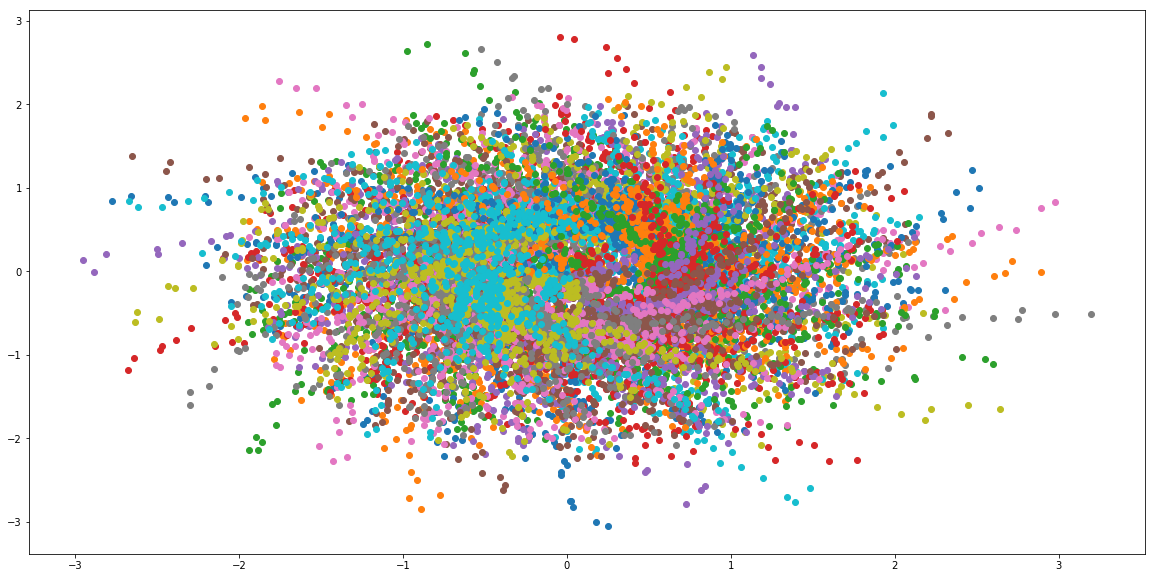

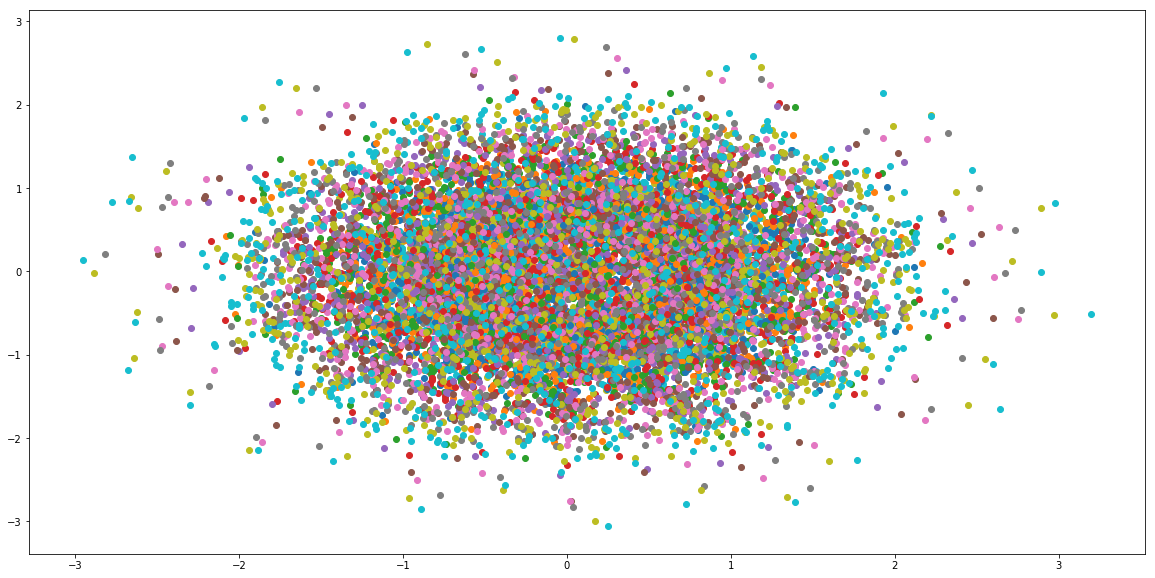

In [70]:
#scatter plot of responses, color-coded by theta
#scatter plot of responses, color-coded by theta
plt.figure(figsize=(20,10))
for t in range(num_rotations):
  plt.scatter(ys[:,:,t,0],ys[:,:,t,1])
plt.show()

#scatter plot of responses, color-coded by scale
plt.figure(figsize=(20,10))
for scale in range(num_scales):
  plt.scatter(ys[:,scale,:,0],ys[:,scale,:,1])
plt.show()

Thetas applied: [  0.          12.4137931   24.82758621  37.24137931  49.65517241
  62.06896552  74.48275862  86.89655172  99.31034483 111.72413793
 124.13793103 136.55172414 148.96551724 161.37931034 173.79310345
 186.20689655 198.62068966 211.03448276 223.44827586 235.86206897
 248.27586207 260.68965517 273.10344828 285.51724138 297.93103448
 310.34482759 322.75862069 335.17241379 347.5862069  360.        ]


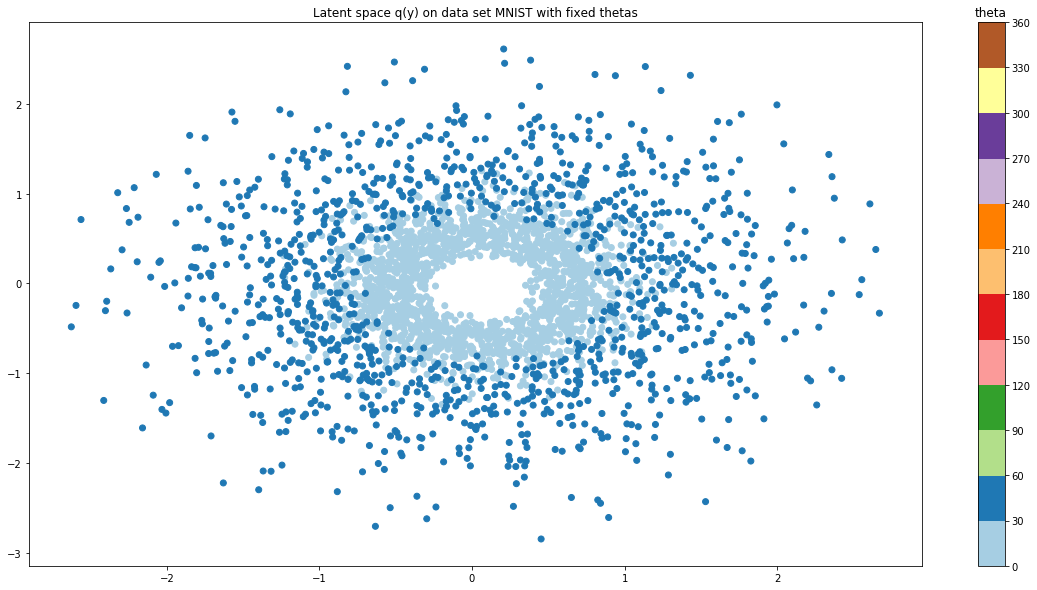

In [60]:
# scatter plot of the ys with thetas
if solver.data_loader.thetas and solver.data_loader.scales and solver.model.z_dim == 2:
    ticks = np.arange(solver.data_loader.theta_range_1[0], solver.data_loader.theta_range_1[1]+1, 30).tolist()
    labels = det_transformation.thetas
    print("Thetas applied: {}".format(labels))
    file_name = solver.data_loader.directories.result_dir + "/plot_y_space_thetas_fixed_"\
                + solver.data_loader.dataset + "_z=" + str(solver.model.z_dim) + ".png"
    plot_y_space_thetas(ys, ticks, labels, solver.data_loader.directories.make_dirs, file_name, solver.data_loader.dataset)

Scales: [0.7  0.85 1.   1.15 1.3 ]


IndexError: index 5 is out of bounds for axis 0 with size 5

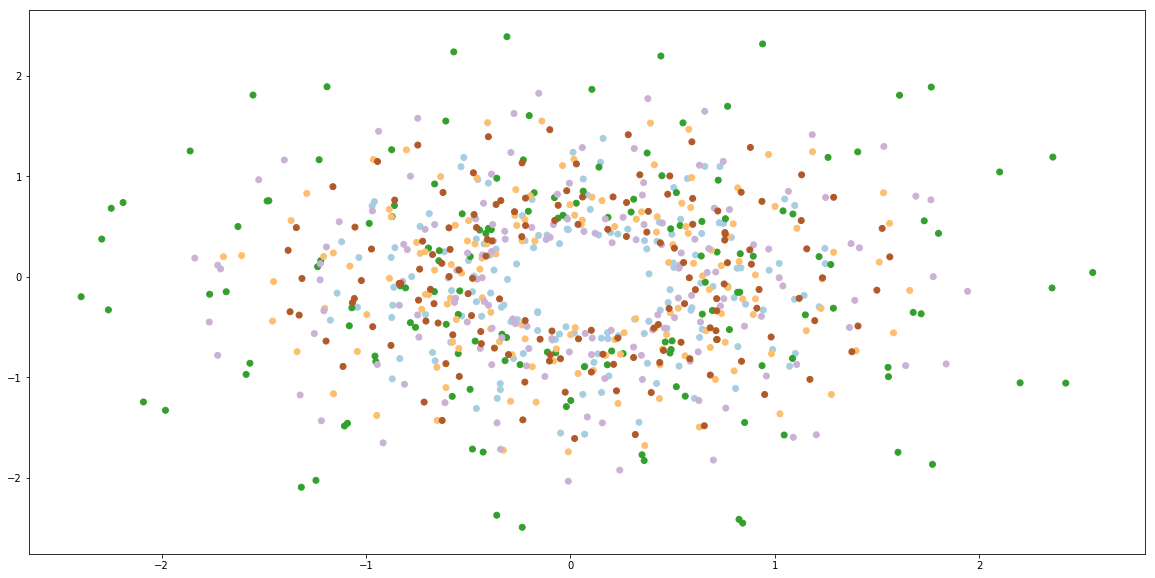

In [61]:
# scatter plot of the ys with scales
if solver.data_loader.thetas and solver.data_loader.scales and solver.model.z_dim == 2:
    labels = det_transformation.scales
    ticks = np.linspace(solver.data_loader.scale_range_1[0], solver.data_loader.scale_range_1[1], 13).tolist()
    ticks = np.around(ticks, decimals=2)
    print("Scales: {}".format(labels))
    file_name = solver.data_loader.directories.result_dir + "/plot_y_space_scales_fixed_"\
                + solver.data_loader.dataset + "_z=" + str(solver.model.z_dim) + ".png"
    plot_y_space_scales(ys, ticks, labels, solver.data_loader.directories.make_dirs, file_name, solver.data_loader.dataset)

In [ ]:
# for rotation
if solver.z_dim == 2 and solver.data_loader.thetas:
    plot_prepro_alpha_params_distribution(solver)
else:
    print("dim(z) is not 2 or rotation mode is not set")

In [ ]:
# for scaling
if solver.z_dim == 2 and solver.data_loader.scales:
    plot_prepro_radius_params_distribution(solver)
else:
    print("dim(z) is not 2 or scaling mode is not set")

(30,)
-3.141408429197344 3.141342603886363
(600, 30)
(18000,) (600, 30)


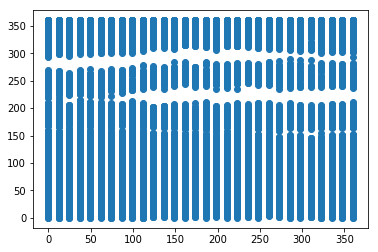

In [23]:
#compute alphas
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scipy.stats as stats
import scipy.spatial.distance as bla

ysflat=np.reshape(ys,(ys.shape[0]*ys.shape[1]*ys.shape[2], 2))
meany=np.mean(ysflat, 0, keepdims=True)
alphas= np.arctan2(ysflat[:,1]-meany[:,1], ysflat[:,0]-meany[:,0])
# ys = np.zeros((transformation.scales.shape[0], transformation.thetas.shape[0], solver.data_loader.num_test_samples, 2))
alphas= np.reshape(alphas, (ys.shape[2] * det_transformation.scales.shape[0], det_transformation.thetas.shape[0]))

print(det_transformation.thetas.shape)
print(np.min(alphas), np.max(alphas))
print(alphas.shape)

#normalize alpha[0]=theta[0]=0
alphas -= alphas[:,0:1]
alphas = alphas/(2*np.pi) * 360
alphas = np.where(alphas > 0, alphas, alphas+360)


thethos = np.repeat(det_transformation.thetas, alphas.shape[0])
#print(np.min(alphas), np.max(alphas), alphas.shape)
#print(thethos.shape, thethos[19998:20003])
#plt.scatter(thetas[200,:], alphas[200,:])
#plt.scatter(thetas[201,:], alphas[201,:])
#thethos = transformation.thetas # np.tile(np.expand_dims(theta,axis=0),(alphas.shape[0],1))/(2*np.pi)/360
#plt.figure(figsize=(20,10))

print(thethos.shape, alphas.shape)
plt.scatter(thethos.flatten(), alphas.flatten())
plt.show()

#plt.scatter(thethos[200:210], alphas[200:210])
#plt.scatter(thethos[211], alphas[211])

In [ ]:
print(solver.data_loader.prepro_params["theta_1"][1][100:200])
print(solver.y_space.shape)
N, M = solver.y_space.shape[1], solver.y_space.shape[0]
# M, N, 2
ysflat = np.reshape(solver.y_space, (N*M, 2)) # NM, 2
meany = np.mean(ysflat, 0, keepdims=True) # 1, 2
alphas = np.arctan2(ysflat[:,1]-meany[:,1], ysflat[:,0]-meany[:,0])
alphas = np.reshape(alphas, (M, N)).T # 20*5, 30
alphas -= alphas[:,0:1]
alphas = alphas/(2*np.pi) * 360
alphas = np.where(alphas >= 0, alphas, alphas+360)
thetas = solver.data_loader.prepro_params["theta_1"].T # M, N
print(alphas.shape, np.min(alphas), np.max(alphas))
print("thetas", thetas.shape, np.min(ysflat), np.max(ysflat))

#scatter = ax.scatter(thetas.flatten(), alphas.flatten())
print(thetas[200,:], alphas[200,:])
plt.scatter(thetas[200,:], alphas[200,:])
plt.scatter(thetas[201,:], alphas[201,:])

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scipy.stats as stats
import scipy.spatial.distance as bla


alphas = torch.atan2(torch.tensor(solver.y_space[:,:,0]-np.mean(solver.y_space[:,:,0])), torch.tensor(solver.y_space[:,:,1]-np.mean(solver.y_space[:,:,1])))/(2*np.pi)
alphas = np.around(np.array(alphas), decimals=2)
# TODO:
alphas = alphas[0,:]
classes = solver.data_labels
alpha_ranges = np.around(np.linspace(np.min(alphas), np.max(alphas), 13), decimals=2)
alpha_bins = list(zip(alpha_ranges[:-1], alpha_ranges[1:]))

# TODO: fix thetas...
print(alphas.shape)
thetas = solver.data_loader.prepro_params["theta_1"][0] #np.radians(solver.data_loader.prepro_params["theta_1"][0].T)
print(thetas)
print(np.min(thetas), np.max(thetas))

#paired_cmap = plt.cm.get_cmap("Paired", 12)
#rvb = mcolors.LinearSegmentedColormap.from_list("", paired_cmap.colors)
alpha_ranges = alpha_ranges[:-1]
#norm = (alpha_ranges - np.min(alpha_ranges))/np.ptp(alpha_ranges)
fig, axes = plt.subplots(nrows=solver.data_loader.n_classes, figsize=(10,60))
for ax, label in zip(axes.flat, range(solver.data_loader.n_classes)):
    indices = np.where(classes == label)[0]
    ax.set_title("class: {}".format(label))
    counts = np.zeros(len(alpha_bins))
    alphas_indices = alphas[indices]
    for alpha in alphas_indices:
        for bin_idx, (x, y) in enumerate(alpha_bins):
            if x <= alpha and alpha < y:
                counts[bin_idx] += 1
                break
    print(counts)
    new_counts = np.zeros(len(alphas_indices))
    asd = 0
    for idx, count in enumerate(counts):
        to_fill = counts[idx].repeat(counts[idx])
        offset = len(to_fill)
        new_counts[asd:(asd+offset)] = to_fill
        asd += offset
    print(len(thetas), len(new_counts), indices, np.min(thetas[indices]), np.max(thetas[indices]))
    scatter = ax.scatter(thetas[indices], alphas_indices, c=new_counts, cmap=plt.cm.get_cmap("Paired", 12))
    fig.colorbar(scatter, ax=ax)
plt.show()

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scipy.stats as stats
import scipy.spatial.distance as bla
solver = torch.load("../results/saved_models/model_TD_CVAE_MNIST_train_loss=88.61_z=2.pt", map_location='cpu')
#solver = torch.load("../results/saved_models/model_TD_CVAE_THETAS_MNIST_train_loss=86.61_z=2.pt", map_location='cpu')
solver.model.eval()


alphas = torch.atan2(torch.tensor(solver.y_space[:,0]-np.mean(solver.y_space[:,0])), torch.tensor(solver.y_space[:,1]-np.mean(solver.y_space[:,1])))/(2*np.pi)
alphas = np.array([round(x,2) for x in alphas.tolist()])
# TODO: problem: for each batch_size, there are num_generation (thetas, alphas), we have to take that into account!
#thetas = np.repeat(solver.data_loader.prepro_params["theta_1"], solver.data_loader.batch_size)
classes = np.array(solver.data_labels)
#y_space_labels = np.repeat(solver.data_loader.prepro_params[key], solver.data_loader.batch_size)
alpha_ranges = np.around(np.linspace(np.min(alphas), np.max(alphas), 13), decimals=2)
alpha_bins = list(zip(alpha_ranges[:-1], alpha_ranges[1:])) # alpha bins
#print(solver.data_loader.prepro_params["theta_1"], solver.data_loader.batch_size)
# TODO: make alphas bins and count, but then flatten the counts, and mark by counts values where each new color begins.
#print(np.sum(counts))
#print(alphas.shape, len(thetas), solver.y_space.shape, len(solver.data_loader.prepro_params["theta_1"]), classes)
# move every 10, because every 10th is the angle for index 0.
thetas = np.repeat(np.array(solver.data_loader.prepro_params["theta_1"][::solver.num_generations]), solver.data_loader.batch_size)
print(thetas.shape)

paired_cmap = plt.cm.get_cmap("Paired", 12)
rvb = mcolors.LinearSegmentedColormap.from_list("", paired_cmap.colors)
alpha_ranges = alpha_ranges[:-1]
norm = (alpha_ranges - np.min(alpha_ranges))/np.ptp(alpha_ranges)
fig, axes = plt.subplots(nrows=solver.data_loader.n_classes, figsize=(10,60))
print(alpha_bins)
for ax, label in zip(axes.flat, range(solver.data_loader.n_classes)):
    indices = np.where(classes == label)[0]
    ax.set_title("class: {}".format(label))
    counts = np.zeros(len(alpha_bins))
    alphas_indices = alphas[indices]
    for alpha in alphas_indices:
        for bin_idx, (x, y) in enumerate(alpha_bins):
            if x <= alpha and alpha < y:
                counts[bin_idx] += 1
                break
    print(counts)
    #print(counts.sum(), len(alphas_indices))
    #print(counts)
    new_counts = np.zeros(len(alphas_indices))
    asd = 0
    for idx, count in enumerate(counts):
        to_fill = counts[idx].repeat(counts[idx])
        offset = len(to_fill)
        #print(asd, offset, to_fill.shape)
        new_counts[asd:(asd+offset)] = to_fill # 0:len(to_fill), len(to_fill):len(new_to_fill)
        asd += offset
    print(len(new_counts))
    scatter = ax.scatter(thetas[indices], alphas_indices, c=new_counts, cmap=plt.cm.get_cmap("Paired", 12))
    fig.colorbar(scatter, ax=ax)
plt.show()

In [ ]:
#solver = torch.load("../results/saved_models/model_TD_CVAE_THETAS_MNIST_train_loss=86.61_z=2.pt", map_location='cpu')
#solver.model.eval()
# compute the alphas
alphas = torch.zeros((solver.y_space.shape[0], solver.num_generations)) # solver.num_generations
for idx, gen_idx in enumerate(range(0, solver.num_generations*2, 2)): # solver.num_generations*2, 2
    alphas[:, idx] = torch.atan2(torch.tensor(solver.y_space[:, gen_idx]-np.mean(solver.y_space[:, gen_idx])),\
            torch.tensor(solver.y_space[:, gen_idx+1]-np.mean(solver.y_space[:, gen_idx+1])))/(2*np.pi)
    # normalizing alpha_{ij} = alpha_{ij} - alpha_{i0}
    #if idx > 0:
    #    alphas[:, idx] -= alphas[:, 0]
alphas = np.around(np.array(alphas), decimals=2)
# prepare the thetas from each batch, repeat each set of theta to span over num train samples
thetas = np.zeros((solver.data_loader.num_train_samples, solver.num_generations))
for gen in range(solver.num_generations):
    thetas[:, gen] = np.radians(np.repeat(solver.data_loader.prepro_params["theta_1"][gen::solver.num_generations], solver.data_loader.batch_size))
#thetas = np.repeat(np.array(solver.data_loader.prepro_params["theta_1"][::solver.num_generations]), solver.data_loader.batch_size)
print(alphas.shape, thetas.shape)
# create the alphas bins, corresponding to the same number as theta bins
mini = np.min(alphas)
maxi = np.max(alphas)
alpha_ranges = np.around(np.linspace(mini, maxi, 13), decimals=2)
alpha_bins = list(zip(alpha_ranges[:-1], alpha_ranges[1:])) # alpha bins
    
print(alphas.shape, thetas.shape)
    #paired_cmap = plt.cm.get_cmap("Paired", 12)
    #rvb = mcolors.LinearSegmentedColormap.from_list("", paired_cmap.colors)
alpha_ranges = alpha_ranges[:-1]
    #norm = (alpha_ranges - np.min(alpha_ranges))/np.ptp(alpha_ranges)
fig, axes = plt.subplots(nrows=solver.data_loader.n_classes, figsize=(10,60))
classes = np.array(solver.data_labels)
for ax, label in zip(axes.flat, range(solver.data_loader.n_classes)):
    indices = np.where(classes == label)[0]
    ax.set_title("class: {}".format(label))
    counts = np.zeros(len(alpha_bins))
    alphas_indices = alphas[indices]
    for i in range(alphas.shape[1]):
        for alpha in alphas_indices[:, i]:
            for bin_idx, (x, y) in enumerate(alpha_bins):
                if x <= alpha and alpha < y:
                    counts[bin_idx] += 1
                    break
    new_counts = np.zeros(np.prod(alphas_indices.shape))
    asd = 0
    for idx, _ in enumerate(counts):
        to_fill = counts[idx].repeat(counts[idx])
        offset = len(to_fill)
        new_counts[asd:(asd+offset)] = to_fill
        asd += offset
    print(len(thetas[indices].flatten()), len(alphas_indices), new_counts.shape, indices.shape)
    scatter = ax.scatter(thetas[indices].flatten(), alphas_indices.flatten(), c=new_counts, cmap=plt.cm.get_cmap("Paired", 12))
    fig.colorbar(scatter, ax=ax)

In [ ]:
#solver = torch.load("../results/saved_models/model_TD_CVAE_THETAS_MNIST_train_loss=86.61_z=2.pt", map_location='cpu')
#solver.model.eval()

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scipy.stats as stats
import scipy.spatial.distance as bla

# compute the alphas
alphas = torch.zeros((solver.y_space.shape[0], solver.num_generations)) # solver.num_generations
for idx, gen_idx in enumerate(range(0, solver.num_generations*2, 2)): # solver.num_generations*2, 2
    alphas[:, idx] = torch.atan2(torch.tensor(solver.y_space[:, gen_idx]-np.mean(solver.y_space[:, gen_idx])),\
            torch.tensor(solver.y_space[:, gen_idx+1]-np.mean(solver.y_space[:, gen_idx+1])))/(2*np.pi)
alphas = np.around(np.array(alphas), decimals=2)

# prepare the thetas from each batch, repeat each set of theta to span over num train samples
thetas = np.zeros((solver.data_loader.num_train_samples, solver.num_generations))
# For each batch we go through num_generations iterations/encodings. Thus, 
# if num_generations is 10, for prepro_params, 0-9 is for batch 0, 10-19 for batch 1 and so on. (every time on the same batch)  
idx = 0
for batch_idx in range(solver.data_loader.num_train_batches):
    start = batch_idx*solver.data_loader.batch_size
    end = (batch_idx+1)*solver.data_loader.batch_size
    for gen in range(solver.num_generations):
        thetas[start:end, gen] = np.repeat(solver.data_loader.prepro_params["theta_1"][idx], solver.data_loader.batch_size)
        idx += 1
    #thetas[:, gen] = np.repeat(solver.data_loader.prepro_params["theta_1"][gen::solver.num_generations], solver.data_loader.batch_size)

mini = np.min(alphas)
maxi = np.max(alphas)
print(mini, maxi)
for idx in range(0, alphas.shape[1]):
    # normalizing alpha_{ij} = alpha_{ij} - alpha_{i0}
    if idx > 0:
        alphas[:, idx] = np.around(alphas[:, idx] - alphas[:, 0] + (np.radians(thetas[:, 0])/(2*np.pi))-0.5, decimals=2)
        #mini = np.min(alphas[:, idx])
        #maxi = np.max(alphas[:, idx])
        #print(mini, maxi)
        #print(np.min(alphas[:, idx]), np.max(alphas[:, idx]))
        neg_indices = np.where(alphas[:, idx] < -0.5)
        pos_indices = np.where(alphas[:, idx] > 0.5)
        alphas[neg_indices, idx] = mini % alphas[neg_indices, idx]
        alphas[pos_indices, idx] = maxi % alphas[pos_indices, idx]
        print(np.min(alphas[:, idx]), np.max(alphas[:, idx]))

# create the alphas bins, corresponding to the same number as theta bins
mini = np.min(alphas)
maxi = np.max(alphas)
alpha_ranges = np.around(np.linspace(mini, maxi, 13), decimals=2)
alpha_bins = list(zip(alpha_ranges[:-1], alpha_ranges[1:])) # alpha bins
alphas = np.around(np.array(alphas), decimals=2)

alpha_ranges = alpha_ranges[:-1]
fig, axes = plt.subplots(nrows=solver.data_loader.n_classes, figsize=(10,60))
classes = np.array(solver.data_labels)
for ax, label in zip(axes.flat, range(solver.data_loader.n_classes)):
    indices = np.where(classes == label)[0]
    ax.set_title("class: {}".format(label))
    counts = np.zeros(len(alpha_bins))
    alphas_indices = alphas[indices]
    for i in range(alphas.shape[1]):
        for alpha in alphas_indices[:, i]:
            for bin_idx, (x, y) in enumerate(alpha_bins):
                if x <= alpha and alpha < y:
                    counts[bin_idx] += 1
                    break
    new_counts = np.zeros(np.prod(alphas_indices.shape))
    asd = 0
    for idx, _ in enumerate(counts):
        to_fill = counts[idx].repeat(counts[idx])
        offset = len(to_fill)
        new_counts[asd:(asd+offset)] = to_fill
        asd += offset
    print(len(thetas[indices].flatten()), len(alphas_indices), new_counts.shape, indices.shape)
    scatter = ax.scatter(np.radians(thetas[indices].flatten(), alphas_indices.flatten(), c=new_counts, cmap=plt.cm.get_cmap("Paired", 12))
    fig.colorbar(scatter, ax=ax)

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scipy.stats as stats
import scipy.spatial.distance as bla

'''
alphas = torch.atan2(torch.tensor(solver.y_space[:,:,0]-np.mean(solver.y_space[:,:,0])), torch.tensor(solver.y_space[:,:,1]-np.mean(solver.y_space[:,:,1])))/(2*np.pi)
alphas = np.around(np.array(alphas), decimals=2)
# TODO:
alphas = alphas[0,:]
classes = solver.data_labels
alpha_ranges = np.around(np.linspace(np.min(alphas), np.max(alphas), 13), decimals=2)
alpha_bins = list(zip(alpha_ranges[:-1], alpha_ranges[1:]))

# TODO: fix thetas...
print(alphas.shape)
thetas = solver.data_loader.prepro_params["theta_1"][0] #np.radians(solver.data_loader.prepro_params["theta_1"][0].T)
print(thetas)
print(np.min(thetas), np.max(thetas))

# compute the alphas
M, N, D = solver.y_space.shape
new_y_space = solver.y_space.reshape((N, M, D))
alphas = torch.zeros((new_y_space.shape[1], new_y_space.shape[2])) # used to be N, D
thetas = np.zeros_like(alphas)
#print(solver.y_space.shape, new_y_space.shape, alphas.shape)
#print(torch.tensor(solver.y_space[: idx, 0]-np.mean(solver.y_space[:, idx, 0])).shape)
for idx in range(solver.y_space.shape[0]):
    print("haha", (torch.tensor(new_y_space[: idx, 0]-np.mean(new_y_space[:, idx, 0]))))
    #alphas[:, idx] = torch.atan2(torch.tensor(new_y_space[: idx, 0]-np.mean(new_y_space[:, idx, 0])),\
    #        torch.tensor(new_y_space[:, idx, 1]-np.mean(new_y_space[:, idx, 1])))/(2*np.pi)
    #thetas[:, idx] = solver.data_loader.prepro_params["theta_1"][idx]
    #if idx > 0:
    #    alphas[:, idx] -= alphas[:, 0]

# TODO:oK?
alphas = torch.zeros((solver.y_space.shape[1], solver.y_space.shape[0]))
thetas = np.zeros_like(alphas)
for idx in range(solver.y_space.shape[0]):
    alphas[:, idx] = torch.atan2(torch.tensor(solver.y_space[idx, :, 0]-np.mean(solver.y_space[idx, :, 0])),\
            torch.tensor(solver.y_space[idx, :, 1]-np.mean(solver.y_space[idx, :, 1])))/(2*np.pi)
    thetas[:, idx] = solver.data_loader.prepro_params["theta_1"][idx]
    if idx > 0:
        alphas[:, idx] = alphas[:, idx]
'''

# M, N, 2
print(solver.data_loader.prepro_params["theta_1"].shape)
N, M = solver.y_space.shape[1], solver.y_space.shape[0]
alphas = torch.zeros((N, M))
thetas = np.zeros_like(alphas)
for idx in range(M):
    alphas[:, idx] = torch.atan2(torch.tensor(solver.y_space[idx, :, 0]-np.mean(solver.y_space[idx, :, 0])),\
            torch.tensor(solver.y_space[idx, :, 1]-np.mean(solver.y_space[idx, :, 1])))/(2*np.pi)
    thetas[:, idx] = solver.data_loader.prepro_params["theta_1"][idx]
    if idx > 0:
        alphas[:, idx] -= alphas[:, 0]
        
alphas = np.around(np.array(alphas), decimals=2)
mini = np.min(alphas)
maxi = np.max(alphas)
print(mini, maxi)
print(alphas.shape, thetas.shape)
print(thetas[100:200])

# create the alphas bins, corresponding to the same number as theta bins
alpha_ranges = np.around(np.linspace(mini, maxi, M), decimals=2)
alpha_ranges = alpha_ranges[:-1]
alpha_bins = list(zip(alpha_ranges[:-1], alpha_ranges[1:])) # alpha bins
# figures
fig, axes = plt.subplots(nrows=solver.data_loader.n_classes, figsize=(10,60))
classes = solver.data_labels
for ax, label in zip(axes.flat, range(solver.data_loader.n_classes)):
    indices = np.where(classes == label)[0]
    ax.set_title("class: {}".format(label))
    counts = np.zeros(len(alpha_bins))
    alphas_indices = alphas[indices]
    for i in range(alphas.shape[1]):
        print(i, alphas_indices[:, i].shape)
        for alpha in alphas_indices[:, i]:
            for bin_idx, (x, y) in enumerate(alpha_bins):
                if x <= alpha and alpha < y:
                    counts[bin_idx] += 1
                    break
    new_counts = np.zeros(np.prod(alphas_indices.shape))
    asd = 0
    for idx, _ in enumerate(counts):
        to_fill = counts[idx].repeat(counts[idx])
        offset = len(to_fill)
        new_counts[asd:(asd+offset)] = to_fill
        asd += offset
    #print(len(thetas[indices].flatten()), len(alphas_indices), new_counts.shape, indices.shape)
    print(len(thetas[indices].flatten()), len(alphas_indices.flatten()))
    scatter = ax.scatter(thetas[indices].flatten(), alphas_indices.flatten(), c=new_counts, cmap=plt.cm.get_cmap("Paired", 12))
    fig.colorbar(scatter, ax=ax)

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scipy.stats as stats
import scipy.spatial.distance as bla
plt.figure(figsize=(20,10))
#print(ys[:,:,0,0].shape)
#print(ys[:,:,0,0].shape)
# ys = np.zeros((transformation.scales.shape[0], transformation.thetas.shape[0], solver.data_loader.num_test_samples, 2))
for t in range(ys.shape[1]):
  plt.scatter(ys[:,t,:,0], ys[:,t,:,1])
plt.show()

plt.figure(figsize=(20,10))
for s in range(ys.shape[0]):
  plt.scatter(ys[s,:,:,0],ys[s,:,:,1])
plt.show()

In [ ]:
#compute alphas
ysflat=np.reshape(ys,(ys.shape[0]*ys.shape[1]*ys.shape[2], 2))
meany=np.mean(ysflat, 0, keepdims=True)
alphas= np.arctan2(ysflat[:,1]-meany[:,1], ysflat[:,0]-meany[:,0])
# ys = np.zeros((transformation.scales.shape[0], transformation.thetas.shape[0], solver.data_loader.num_test_samples, 2))
alphas= np.reshape(alphas, (ys.shape[2] * det_transformation.scales.shape[0], det_transformation.thetas.shape[0]))

print(det_transformation.thetas.shape)
print(np.min(alphas), np.max(alphas))
print(alphas.shape)

#normalize alpha[0]=theta[0]=0
alphas -= alphas[:,0:1]
alphas = alphas/(2*np.pi) * 360
alphas = np.where(alphas > 0, alphas, alphas+360)


thethos = np.repeat(det_transformation.thetas, alphas.shape[0])
#print(np.min(alphas), np.max(alphas), alphas.shape)
#print(thethos.shape, thethos[19998:20003])
#plt.scatter(thetas[200,:], alphas[200,:])
#plt.scatter(thetas[201,:], alphas[201,:])
#thethos = transformation.thetas # np.tile(np.expand_dims(theta,axis=0),(alphas.shape[0],1))/(2*np.pi)/360
#plt.figure(figsize=(20,10))
plt.scatter(thethos.flatten(), alphas.flatten())
plt.show()

In [ ]:
print(solver.data_loader.prepro_params["theta_1"][1][100:200])
print(solver.y_space.shape)
N, M = solver.y_space.shape[1], solver.y_space.shape[0]
# M, N, 2
ysflat = np.reshape(solver.y_space, (N*M, 2)) # NM, 2
meany = np.mean(ysflat, 0, keepdims=True) # 1, 2
alphas = np.arctan2(ysflat[:,1]-meany[:,1], ysflat[:,0]-meany[:,0])
alphas = np.reshape(alphas, (M, N)).T # 20*5, 30
alphas -= alphas[:,0:1]
alphas = alphas/(2*np.pi) * 360
alphas = np.where(alphas >= 0, alphas, alphas+360)
thetas = solver.data_loader.prepro_params["theta_1"].T # M, N
print(alphas.shape, np.min(alphas), np.max(alphas))
print("thetas", thetas.shape, np.min(ysflat), np.max(ysflat))

#scatter = ax.scatter(thetas.flatten(), alphas.flatten())
print(thetas[200,:], alphas[200,:])
plt.scatter(thetas[200,:], alphas[200,:])
plt.scatter(thetas[201,:], alphas[201,:])

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scipy.stats as stats
import scipy.spatial.distance as bla

######################################################################

#solver = torch.load("../results/show_oswin/29/model_TD_CVAE_THETAS_MNIST_train_loss=158.23_z=2.pt", map_location='cpu')
#solver.model.eval()

N, M = ys
M = 2
alphas = np.zeros((N, M))
thetas = np.zeros_like(alphas)
alphas[:, 0] = torch.atan2(torch.tensor(solver.y_space[0, :, 0]-np.mean(solver.y_space[0, :, 0])),\
            torch.tensor(solver.y_space[0, :, 1]-np.mean(solver.y_space[0, :, 1])))
alphas[:, 1] = torch.atan2(torch.tensor(solver.y_space[1, :, 0]-np.mean(solver.y_space[1, :, 0])),\
            torch.tensor(solver.y_space[1, :, 1]-np.mean(solver.y_space[1, :, 1])))
alphas = np.array(alphas)
alphas[:, 1] -= alphas[:, 0]
alphas /= (2*np.pi)/360
alphas = np.around(alphas, decimals=2)
thetas[:, 0] = solver.data_loader.prepro_params["theta_1"][0]
thetas[:, 1] = solver.data_loader.prepro_params["theta_1"][1]
alphas = np.where(alphas >= 0, alphas, alphas+360)

print(thetas[:, 0])
print(thetas[:, 1])

'''
M=1
alphas = torch.zeros((N, 1))
thetas = np.zeros_like(alphas)
alphas[:, 0] = torch.atan2(torch.tensor(solver.y_space[0, :, 0]-np.mean(solver.y_space[0, :, 0])),\
            torch.tensor(solver.y_space[0, :, 1]-np.mean(solver.y_space[0, :, 1])))/(2*np.pi)
alphas = np.around(np.array(alphas), decimals=2)
thetas[:, 0] = solver.data_loader.prepro_params["theta_1"][0]
'''

'''
N, M = solver.y_space.shape[1], solver.y_space.shape[0]
alphas = torch.zeros((N, M))
thetas = np.zeros_like(alphas)
for idx in range(M):
    alphas[:, idx] = torch.atan2(torch.tensor(solver.y_space[idx, :, 0]-np.mean(solver.y_space[idx, :, 0])),\
            torch.tensor(solver.y_space[idx, :, 1]-np.mean(solver.y_space[idx, :, 1])))/(2*np.pi)
    thetas[:, idx] = solver.data_loader.prepro_params["theta_1"][idx]
    alphas = np.around(np.array(alphas), decimals=2)
    if idx > 0:
        alphas[:, idx] -= alphas[:, 0]
        #neg_indices = np.where(alphas[:, idx] < -0.5)
        #pos_indices = np.where(alphas[:, idx] > 0.5)
        #alphas[neg_indices, idx] = mini % alphas[neg_indices, idx]
        #alphas[pos_indices, idx] = maxi % alphas[pos_indices, idx]
alphas = np.around(np.array(alphas), decimals=2)
'''
#solver = torch.load("../results/show_oswin/29/model_TD_CVAE_THETAS_MNIST_train_loss=158.23_z=2.pt", map_location='cpu')
#solver.model.eval()

mini = np.min(alphas)
maxi = np.max(alphas)
# create the alphas bins, corresponding to the same number as theta bins
alpha_ranges = np.around(np.linspace(mini, maxi, 13), decimals=2)
alpha_bins = list(zip(alpha_ranges[:-1], alpha_ranges[1:])) # alpha bins
print(alphas.shape)
# figures
fig, axes = plt.subplots(nrows=solver.data_loader.n_classes, figsize=(10,60))
classes = solver.data_labels
for ax, label in zip(axes.flat, range(solver.data_loader.n_classes)):
    indices = np.where(classes == label)[0]
    ax.set_title("class: {}".format(label))
    counts = np.zeros(len(alpha_bins))
    alphas_indices = alphas[indices, 1:] # , 1:
    for i in range(alphas_indices.shape[1]):
        print(i, alphas_indices.shape)
        for alpha in alphas_indices[:, i]:
            for bin_idx, (x, y) in enumerate(alpha_bins):
                if x <= alpha and alpha < y:
                    counts[bin_idx] += 1
                    break
    new_counts = np.zeros(np.prod(alphas_indices.shape))
    asd = 0
    for idx, _ in enumerate(counts):
        to_fill = counts[idx].repeat(counts[idx])
        offset = len(to_fill)
        new_counts[asd:(asd+offset)] = to_fill
        asd += offset
    thets = thetas[indices, 1:] # , 1:
    #print(len(thetas[indices].flatten()), len(alphas_indices), new_counts.shape, indices.shape)
    print(len(thets.flatten()), len(alphas_indices.flatten()))
    scatter = ax.scatter(thets.flatten(), alphas_indices.flatten(), c=new_counts, cmap=plt.cm.get_cmap("Paired", 12))
    fig.colorbar(scatter, ax=ax)

In [ ]:
'''
#compute alphas
ysflat=np.reshape(ys,(ys.shape[0]*ys.shape[1] * ys.shape[2],2))
meany=np.mean(ysflat,0,keepdims=True)
alphas= np.arctan2(ysflat[:,1]-meany[:,1], ysflat[:,0]-meany[:,0])
alphas= np.reshape(alphas,(ys.shape[0] * s.shape[0], theta.shape[0]))

#normalize alpha[0]=theta[0]=0
alphas -= alphas[:,0:1]
alphas = alphas/(2*np.pi) * 360
alphas = np.where(alphas > 0, alphas, alphas+360)
'''
solver = torch.load("../results/show_oswin/29/model_TD_CVAE_THETAS_MNIST_train_loss=158.23_z=2.pt", map_location='cpu')
solver.model.eval()

print(solver.data_loader.prepro_params["theta_1"][1][100:200])
print(solver.y_space.shape)
N, M = solver.y_space.shape[1], solver.y_space.shape[0]
# M, N, 2
ysflat = np.reshape(solver.y_space, (N*M, 2)) # NM, 2
meany = np.mean(ysflat, 0, keepdims=True) # 1, 2
alphas = np.arctan2(ysflat[:,1]-meany[:,1], ysflat[:,0]-meany[:,0])
alphas = np.reshape(alphas, (M, N)).T # 20*5, 30
alphas -= alphas[:,0:1]
alphas = alphas/(2*np.pi) * 360
alphas = np.where(alphas >= 0, alphas, alphas+360)
thetas = solver.data_loader.prepro_params["theta_1"].T # M, N
print(alphas.shape, np.min(alphas), np.max(alphas))
print("thetas", thetas.shape, np.min(ysflat), np.max(ysflat))

#scatter = ax.scatter(thetas.flatten(), alphas.flatten())
print(thetas[200,:], alphas[200,:])
plt.scatter(thetas[200,:], alphas[200,:])
plt.scatter(thetas[201,:], alphas[201,:])
'''
for idx in range(M):
    alphas[:, idx] = torch.atan2(torch.tensor(solver.y_space[idx, :, 0]-np.mean(solver.y_space[idx, :, 0])),\
            torch.tensor(solver.y_space[idx, :, 1]-np.mean(solver.y_space[idx, :, 1])))/(2*np.pi)
    thetas[:, idx] = solver.data_loader.prepro_params["theta_1"][idx]
    alphas = np.around(np.array(alphas), decimals=2)
    if idx > 0:
        alphas[:, idx] -= alphas[:, 0]
alphas = np.around(np.array(alphas), decimals=2)
'''

'''
mini = np.min(alphas)
maxi = np.max(alphas)
# create the alphas bins, corresponding to the same number as theta bins
alpha_ranges = np.around(np.linspace(mini, maxi, 13), decimals=2)
alpha_bins = list(zip(alpha_ranges[:-1], alpha_ranges[1:])) # alpha bins
print(alphas.shape)
# figures
fig, axes = plt.subplots(nrows=solver.data_loader.n_classes, figsize=(10,60))
classes = solver.data_labels
for ax, label in zip(axes.flat, range(solver.data_loader.n_classes)):
    indices = np.where(classes == label)[0]
    ax.set_title("class: {}".format(label))
    counts = np.zeros(len(alpha_bins))
    alphas_indices = alphas[indices] # , 1:
    for i in range(alphas_indices.shape[1]):
        print(i, alphas_indices.shape)
        for alpha in alphas_indices[:, i]:
            for bin_idx, (x, y) in enumerate(alpha_bins):
                if x <= alpha and alpha < y:
                    counts[bin_idx] += 1
                    break
    new_counts = np.zeros(np.prod(alphas_indices.shape))
    asd = 0
    for idx, _ in enumerate(counts):
        to_fill = counts[idx].repeat(counts[idx])
        offset = len(to_fill)
        new_counts[asd:(asd+offset)] = to_fill
        asd += offset
    thets = thetas[indices] # , 1:
    #print(len(thetas[indices].flatten()), len(alphas_indices), new_counts.shape, indices.shape)
    print(len(thets.flatten()), len(alphas_indices.flatten()))
    scatter = ax.scatter(thets.flatten(), alphas_indices.flatten(), c=new_counts, cmap=plt.cm.get_cmap("Paired", 12))
    fig.colorbar(scatter, ax=ax)
'''

In [ ]:
radiuses = np.zeros((solver.y_space.shape[0], solver.num_generations))
centroid = np.mean(solver.y_space[:, :2], axis=0)
# compute the euclidean distance from each point y_{ij} to the center, so the radiuses
#print(solver.data_loader.train_loader.dataset.transform.transforms.prepro_params)
#print(solver.data_loader.prepro_params["scale_1"])
for idx, gen_idx in enumerate(range(0, solver.num_generations*2, 2)):
    radiuses[:, idx] = bla.cdist(solver.y_space[:, gen_idx:gen_idx+2], np.atleast_2d(centroid)).ravel()
    if idx > 0:
        radiuses[:, idx] -= radiuses[:, 0]
    #radiuses = np.around(np.array(radiuses), decimals=2)
    # prepare the scale from each batch, repeat each set of scales to span over num train samples
#print(solver.data_loader.prepro_params)
scales = np.zeros((solver.data_loader.num_train_samples, solver.num_generations))
for idx in range(solver.num_generations):
    #thetas[:, gen] = np.repeat(solver.data_loader.prepro_params["theta_1"][gen::solver.num_generations], solver.data_loader.batch_size)
    scales[:, idx] = np.repeat(solver.data_loader.prepro_params["scale_1"][gen::solver.num_generations], solver.data_loader.batch_size)
    # create the alphas bins, corresponding to the same number as theta bins
mini = np.min(radiuses)
maxi = np.max(radiuses)
radius_ranges = np.around(np.linspace(mini, maxi, 5), decimals=2)
radius_bins = list(zip(radius_ranges[:-1], radius_ranges[1:]))

fig, axes = plt.subplots(nrows=solver.data_loader.n_classes, figsize=(10, 60))
classes = np.array(solver.data_labels)
for ax, label in zip(axes.flat, range(solver.data_loader.n_classes)):
    indices = np.where(classes == label)[0]
    ax.set_title("class: {}".format(label))
    counts = np.zeros(len(radius_bins))
    radius_indices = radiuses[indices]
    for i in range(radiuses.shape[1]):
        for alpha in radius_indices[:, i]:
            for bin_idx, (x, y) in enumerate(radius_bins):
                if x <= alpha and alpha < y:
                    counts[bin_idx] += 1
                    break
    new_counts = np.zeros(np.prod(radius_indices.shape))
    asd = 0
    for idx, _ in enumerate(counts):
        to_fill = counts[idx].repeat(counts[idx])
        offset = len(to_fill)
        new_counts[asd:(asd+offset)] = to_fill
        asd += offset
    scatter = ax.scatter(scales[indices, :].flatten(), radius_indices.flatten(), c=new_counts, cmap=plt.cm.get_cmap("Paired", 12))
    fig.colorbar(scatter, ax=ax)

In [ ]:
last_train_loss = solver.train_loss_history["train_loss_acc"][-1]
mode = ""
if solver.data_loader.directories.make_dirs:
    if solver.data_loader.thetas and solver.data_loader.scales:
        mode = "SCALES_THETAS_"
    elif solver.data_loader.thetas:
        mode += "THETAS_"
    elif solver.data_loader.scales:
        mode += "SCALES_"
torch.save(solver, solver.data_loader.directories.result_dir + "/model_TD_CVAE_" + mode + solver.data_loader.dataset + "_train_loss=" + "{0:.2f}".format(last_train_loss) + "_z=" + str(solver.model.z_dim) + ".pt")